In [1]:
import pandas as pd
s = pd.read_csv(r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\inspect_summary.csv")
print(s.sort_values('score', ascending=False).head(5).to_string(index=False))

                                                                 file                                                                                                                                       path  score     years  prov_count  nrows  ncols  missing_votes_per100k  missing_denuncies_per100k  missing_population  missing_feminicidis_per100k
                                                dataset_locf_2024.csv                                                 C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\dataset_locf_2024.csv 13.313 2000-2024        52.0   1196     31                    0.0                     0.0435                 0.0                       0.0435
                                                 dataset_original.csv                                                  C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\dataset_original.csv 13.313 2000-2024        52.0   1196     29                    0.0                     0.0

In [2]:
import pandas as pd, os
FOLDER = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals"
PATH_ORIG = os.path.join(FOLDER, "rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv")
PATH_IMP = os.path.join(FOLDER, "imputed_iterative_rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv")

orig = pd.read_csv(PATH_ORIG)
imp = pd.read_csv(PATH_IMP)

# assegurar que tenim columnes year, province i immigracio_used o immigracio_per100k_used
col_used = 'immigracio_used' if 'immigracio_used' in imp.columns else 'immigracio_per100k_used' if 'immigracio_per100k_used' in imp.columns else 'immigracio'
for yr in [2023,2024]:
    tmp = imp[imp['year']==yr][['province', col_used]].set_index('province')
    if yr==2023:
        t2023 = tmp
    else:
        t2024 = tmp

comp = t2023.join(t2024, lsuffix='_2023', rsuffix='_2024')
comp['pct_change'] = (comp[f'{col_used}_2024'] - comp[f'{col_used}_2023']) / comp[f'{col_used}_2023'].replace({0:pd.NA})
comp_sorted = comp.sort_values('pct_change', ascending=False)
print(comp_sorted[['%s_2023' % col_used, '%s_2024' % col_used, 'pct_change']].head(30).to_string())

               immigracio_used_2023  immigracio_used_2024  pct_change
province                                                             
Soria                        2405.0             147340.70   60.264324
Gipuzkoa                    12259.0             433353.92   34.349859
Lugo                         5625.0             147561.88   25.233223
Palencia                     2147.0              30727.48   13.311821
Lleida                      13450.0             158095.12   10.754284
Zaragoza                    22760.0             193552.30    7.504055
Cuenca                       4941.0              27338.24    4.532937
Bizkaia                     19714.0             103494.64    4.249804
La Rioja                     6537.0              28293.54    3.328215
Murcia                      40240.0             155202.08    2.856911
Illes Balears               45349.0             171910.22    2.790827
Melilla                      2042.0               7652.18    2.747395
Burgos              

In [3]:
import pandas as pd, os
FOLDER = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals"
PATH_IMP = os.path.join(FOLDER, "imputed_iterative_rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv")
imp = pd.read_csv(PATH_IMP)

col = 'immigracio_per100k_used' if 'immigracio_per100k_used' in imp.columns else 'immigracio_used'
t2023 = imp[imp['year']==2023][['province', col]].set_index('province')
t2024 = imp[imp['year']==2024][['province', col]].set_index('province')
comp = t2023.join(t2024, lsuffix='_2023', rsuffix='_2024')
comp['pct_change'] = (comp[f'{col}_2024'] - comp[f'{col}_2023']) / comp[f'{col}_2023'].replace({0:pd.NA})
print(comp.sort_values('pct_change', ascending=False).head(20).to_string())

               immigracio_per100k_used_2023  immigracio_per100k_used_2024  pct_change
province                                                                             
Lugo                            1734.681605                  17044.359407    8.825641
Gipuzkoa                        1686.913110                  11436.842397    5.779746
Palencia                        1360.695114                   8920.137059    5.555574
Zaragoza                        2323.954807                  12735.213107    4.479975
Lleida                          3006.641436                  14157.397757    3.708708
Soria                           2686.310428                  12207.245713    3.544242
Murcia                          2593.298155                  11121.289181    3.288473
Burgos                          1872.009402                   6828.980141    2.647941
Madrid                          3463.945868                  11981.450193    2.458902
Bizkaia                         1709.382441           

In [4]:
import os
import pandas as pd

FOLDER = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals"
FNAME = "rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv"
PATH = os.path.join(FOLDER, FNAME)

print("Path:", PATH)
df = pd.read_csv(PATH)
print("Desar shape:", df.shape)
print("Columnes:", df.columns.tolist())
print("Capçalera:")
print(df.head().to_string(index=False))

Path: C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv
Desar shape: (1196, 29)
Columnes: ['province_norm', 'year', 'province', 'population', 'population_imputed_from_nearest', 'denuncies', 'denuncies_per100k', 'ordres', 'ordres_per100k', 'feminicidis', 'feminicidis_per100k', 'immigracio', 'immigracio_per100k', 'votes', 'votes_per100k', 'atur_annual_mean_pct', 'n_quarters', 'atur_used_pct', 'unemployed_est', 'unemployed_per100k', 'votes_final', 'votes_imputed_method', 'votes_combined', 'votes_source_observed_count', 'votes_imputed_flag', 'votes_original', 'votes_used', 'votes_used_flag', 'votes_per100k_used']
Capçalera:
province_norm  year province  population  population_imputed_from_nearest  denuncies  denuncies_per100k  ordres  ordres_per100k  feminicidis  feminicidis_per100k  immigracio  immigracio_per100k  votes  votes_per100k  atur_annual_mean_pct  n_quarters  atur_used_pct  unemployed_est  u

In [5]:
df_no2000 = df[df['year'] != 2000].copy()
out1 = os.path.join(FOLDER, "processed_dataset_no2000.csv")
df_no2000.to_csv(out1, index=False)
print("Desar:", out1, "shape:", df_no2000.shape)

Desar: C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\processed_dataset_no2000.csv shape: (1144, 29)


In [6]:
df_no2024 = df[df['year'] != 2024].copy()
out2 = os.path.join(FOLDER, "processed_dataset_no2024.csv")
df_no2024.to_csv(out2, index=False)
print("Desat:", out2, "shape:", df_no2024.shape)

Desat: C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\processed_dataset_no2024.csv shape: (1144, 29)


In [7]:
# 1) Importacions i paràmetres

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Opcions visuals
sns.set(style="whitegrid", context="notebook", rc={"figure.figsize": (12, 6)})
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 220)

# Ruta al fitxer CSV

FOLDER = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals"
FNAME = "rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv"
PATH = os.path.join(FOLDER, FNAME)

In [8]:
# 2) Carregar dades

# Intentar llegir amb encoding utf-8-sig
if not os.path.exists(PATH):
    raise FileNotFoundError(f"No trobat el fitxer: {path}. Posar el CSV al mateix directori o actualitzar data_path.")

df = pd.read_csv(PATH, encoding="utf-8-sig")
print("Dimensions:", df.shape)
df.head(6)

Dimensions: (1196, 29)


,province_norm,year,province,population,population_imputed_from_nearest,denuncies,denuncies_per100k,ordres,ordres_per100k,feminicidis,feminicidis_per100k,immigracio,immigracio_per100k,votes,votes_per100k,atur_annual_mean_pct,n_quarters,atur_used_pct,unemployed_est,unemployed_per100k,votes_final,votes_imputed_method,votes_combined,votes_source_observed_count,votes_imputed_flag,votes_original,votes_used,votes_used_flag,votes_per100k_used
0,a coruna,2000,NaN,1100954.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.0,70.393495,NaN,NaN,NaN,NaN,NaN,775.0,observed,775.0,1,observed,775.0,775.0,original,70.393495
1,a coruna,2003,A Coruna,1100954.0,False,12540.0,1139.012166,0.0,0.000000,3.0,0.272491,18212.0,1654.201720,0.0,0.000000,13.7550,4.0,13.7550,151436.222700,13755.0,775.0,locf_bfill,0.0,1,locf_bfill,0.0,775.0,imputed_used,70.393495
2,a coruna,2004,A Coruna,1104699.0,False,13880.0,1256.450852,5420.0,490.631385,1.0,0.090522,19945.0,1805.469182,926.0,83.823738,14.5075,4.0,14.5075,160264.207425,14507.5,926.0,observed,926.0,1,observed,926.0,926.0,original,83.823738
3,a coruna,2005,A Coruna,1109955.0,False,10550.0,950.488984,4060.0,365.780595,0.0,0.000000,23855.0,2149.186228,0.0,0.000000,9.6325,4.0,9.6325,106916.415375,9632.5,926.0,locf_bfill,0.0,1,locf_bfill,0.0,926.0,imputed_used,83.426806
4,a coruna,2006,A Coruna,1115415.0,False,22010.0,1973.256591,6530.0,585.432328,0.0,0.000000,25468.0,2283.275731,0.0,0.000000,8.1225,4.0,8.1225,90599.583375,8122.5,926.0,locf_bfill,0.0,1,locf_bfill,0.0,926.0,imputed_used,83.018428
5,a coruna,2007,A Coruna,1121347.0,False,19830.0,1768.408887,5010.0,446.784091,2.0,0.178357,28137.0,2509.214365,0.0,0.000000,8.2225,4.0,8.2225,92202.757075,8222.5,926.0,locf_bfill,0.0,1,locf_bfill,0.0,926.0,imputed_used,82.579255


In [9]:
# 3) Revisió de l'estructura i valors nuls

# Resum de valors nuls
try:
    df.info(verbose=True, show_counts=True)
except TypeError:
    # fallback senzill
    df.info(verbose=True)

# Comptatge i percentatge de nuls per columna
null_counts = df.isna().sum().sort_values(ascending=False)
null_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print("\nTop 30 columnes amb més nuls (comptes):")
print(null_counts.head(30))
print("\nTop 30 columnes amb més nuls (percentatge):")
print(null_pct.head(30))

# 4) Neteja i conversions bàsiques
# - Normalització d'espais en noms de província
# - Convertir year a int
# - Comprovar columnes numèriques i forçar a float si cal

# Netejar noms de província
if "province_norm" in df.columns:
    df["province_norm"] = df["province_norm"].astype(str).str.strip().str.lower()
if "province" in df.columns:
    df["province"] = df["province"].astype(str).str.strip()

# Year -> int
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# Detectar columnes numèriques que són objectes (per convertir)
obj_num_cols = [c for c in df.columns if df[c].dtype == "object" and c not in ["province", "province_norm", "votes_imputed_method", "votes_source_observed_count", "votes_imputed_flag", "votes_used_flag", "votes_original", "votes_source_observed_count", "votes_combined", "votes_source"]]
# Forcem conversió 
for c in obj_num_cols:
    # intentar convertir a numeric i veure % no convertibles
    converted = pd.to_numeric(df[c].str.replace(",", ".", regex=False), errors="coerce")
    n_non_null = converted.notna().sum()
    if n_non_null > 0:
        df[c] = converted

# assegurar que columnes específiques són numèriques
numeric_cols = [
    "population", "denuncies", "denuncies_per100k", "ordres", "ordres_per100k",
    "feminicidis", "feminicidis_per100k", "immigracio", "immigracio_per100k",
    "votes", "votes_per100k", "atur_annual_mean_pct", "unemployed_est", "unemployed_per100k",
    "votes_final", "votes_used", "votes_per100k_used"
]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# resum de valors numèrics
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   province_norm                    1196 non-null   object 
 1   year                             1196 non-null   int64  
 2   province                         1144 non-null   object 
 3   population                       1196 non-null   float64
 4   population_imputed_from_nearest  1196 non-null   bool   
 5   denuncies                        1144 non-null   float64
 6   denuncies_per100k                1144 non-null   float64
 7   ordres                           1144 non-null   float64
 8   ordres_per100k                   1144 non-null   float64
 9   feminicidis                      1144 non-null   float64
 10  feminicidis_per100k              1144 non-null   float64
 11  immigracio                       1092 non-null   float64
 12  immigracio_per100k  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
province_norm,1196,52,a coruna,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1196.0,<NA>,<NA>,<NA>,2012.913043,6.79102,2000.0,2007.0,2013.0,2019.0,2024.0
province,1196,53,nan,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1196.0,NaN,NaN,NaN,882273.706522,1127684.185507,64754.0,322096.75,590320.0,1003359.75,7009268.0
population_imputed_from_nearest,1196,2,False,1144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
denuncies,1144.0,NaN,NaN,NaN,27270.743007,39125.854426,0.0,5950.0,14050.0,31075.0,320040.0
denuncies_per100k,1144.0,NaN,NaN,NaN,2696.819159,1159.891122,0.0,1845.735785,2475.130377,3443.752762,7322.180139
ordres,1144.0,NaN,NaN,NaN,6897.867133,9787.63317,0.0,1660.0,3845.0,7782.5,65700.0
ordres_per100k,1144.0,NaN,NaN,NaN,719.702042,321.981949,0.0,539.326276,711.370085,902.222683,2262.915492
feminicidis,1144.0,NaN,NaN,NaN,1.131993,1.599724,0.0,0.0,1.0,2.0,11.0


,province_norm,year,province,population,population_imputed_from_nearest,denuncies,denuncies_per100k,ordres,ordres_per100k,feminicidis,feminicidis_per100k,immigracio,immigracio_per100k,votes,votes_per100k,atur_annual_mean_pct,n_quarters,atur_used_pct,unemployed_est,unemployed_per100k,votes_final,votes_imputed_method,votes_combined,votes_source_observed_count,votes_imputed_flag,votes_original,votes_used,votes_used_flag,votes_per100k_used
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,52,52,52,52,52,52,52,52,0,0,52,52,52,52,52,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Guardat CSV net a: rates_all_metrics_cleaned.csv


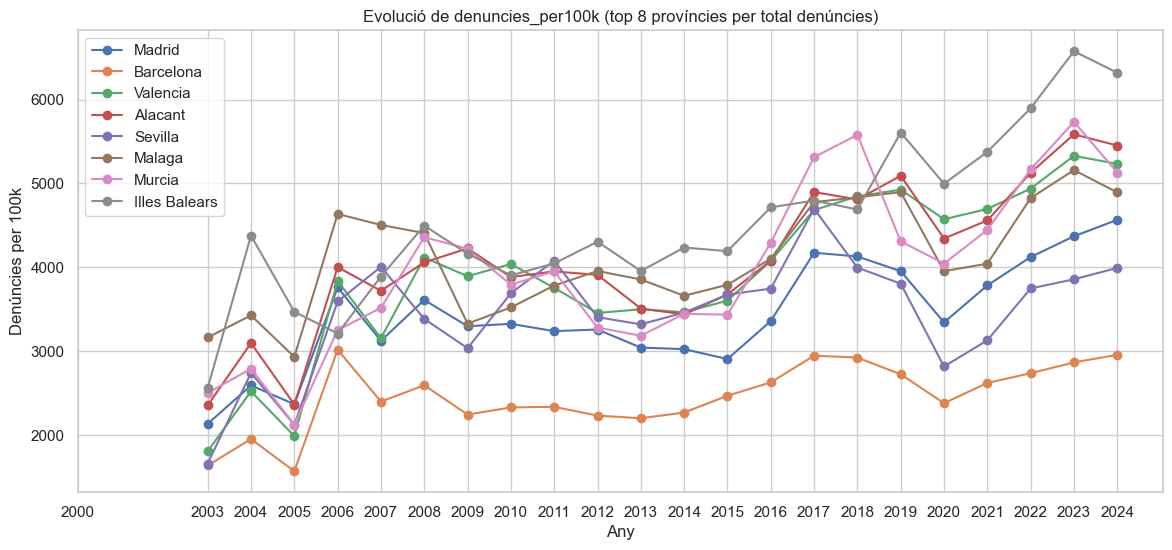

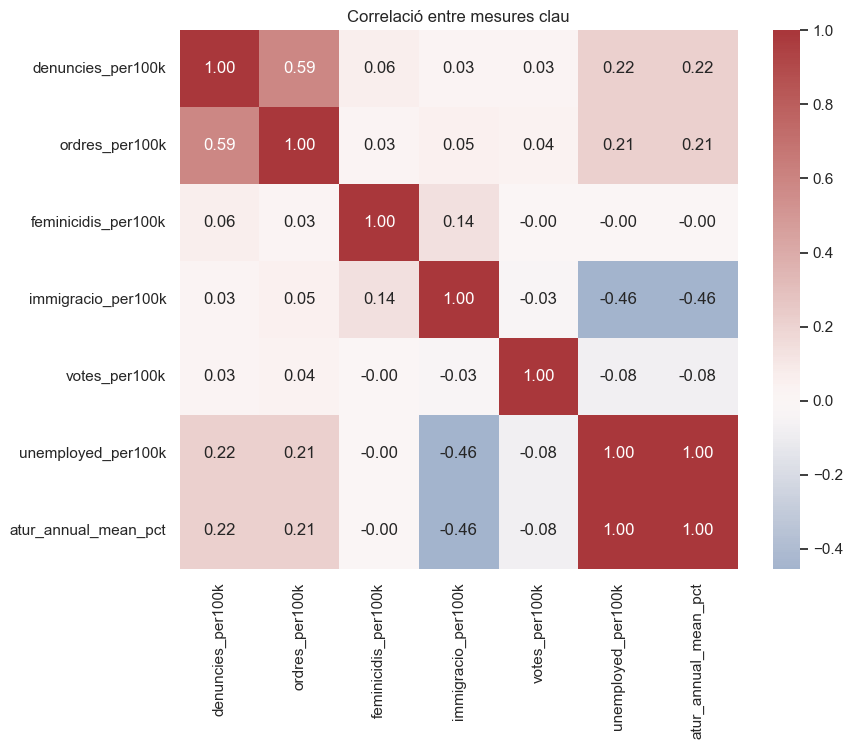

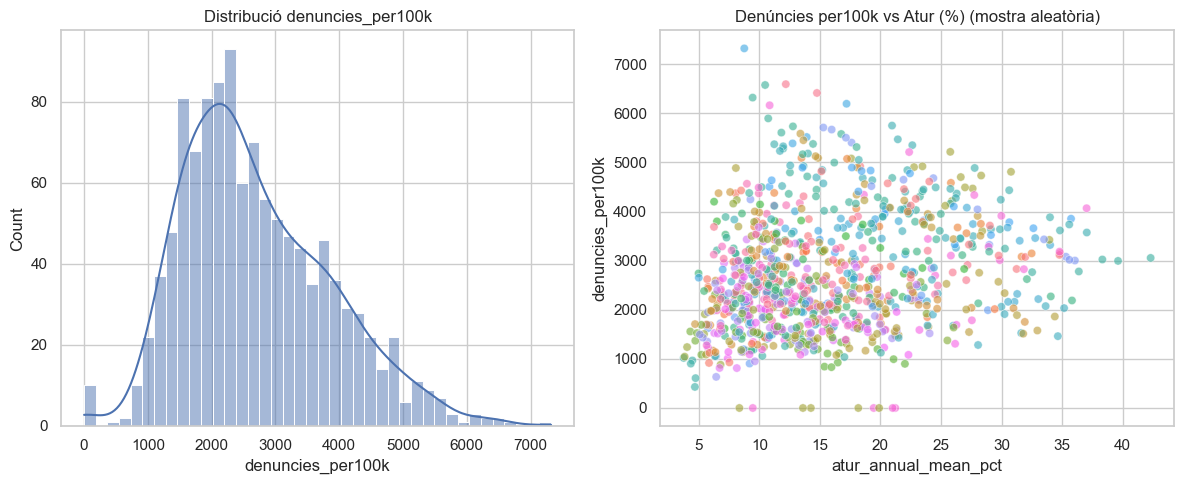

province_norm
madrid                    135.0
barcelona                 129.0
alacant                    73.0
valencia                   69.0
malaga                     57.0
sevilla                    49.0
santa cruz de tenerife     48.0
granada                    43.0
illes balears              42.0
almeria                    40.0
Name: feminicidis, dtype: float64

year
2023    1991660.0
2024    1990930.0
2022    1820780.0
2019    1681680.0
2018    1669610.0
2017    1662600.0
2021    1628480.0
2020    1508040.0
2016    1435350.0
2008    1421250.0
Name: denuncies, dtype: float64

Guardat resum per província a province_summary.csv


,province_norm,years_count,denuncies_total,denuncies_per100k_mean,feminicidis_total,atur_mean_pct
32,madrid,23,4850760.0,3430.792865,135.0,12.202045
8,barcelona,23,2968670.0,2455.489603,129.0,13.118295
48,valencia,23,2199200.0,3928.697024,69.0,16.336705
1,alacant,23,1654850.0,4096.801950,73.0,17.776364
43,sevilla,23,1448230.0,3452.675761,49.0,21.995568
33,malaga,23,1448030.0,4111.409590,57.0,21.630341
35,murcia,23,1283220.0,3994.006156,36.0,16.936932
25,illes balears,23,1103030.0,4535.521924,42.0,13.847727
28,las palmas,23,1054870.0,4468.285407,36.0,21.923295
12,cadiz,23,911830.0,3377.753018,25.0,26.923523


In [10]:
# 5) Missing values: resum per província/any i per columna

# Percentatge de nuls per columna
null_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
null_pct[null_pct > 0].head(80)

# Nuls per any
if "year" in df.columns:
    nulls_by_year = df.groupby("year").apply(lambda x: x.isna().sum())
    display(nulls_by_year.head())

# Mostrar quines províncies tenen més dades faltants
key_cols = ["denuncies", "denuncies_per100k", "feminicidis", "feminicidis_per100k", "votes", "votes_per100k"]
prov_null = df.groupby("province_norm")[key_cols].apply(lambda g: g.isna().sum()).sort_values(by="denuncies", ascending=False)
prov_null.head(20)

# 6) Estratègia ràpida de neteja
# Creem una còpia neta per treballar
df_clean = df.copy()

# Eliminem files sense year (normalment no útils en sèries temporals)
df_clean = df_clean[df_clean["year"].notna()]

# Exemple d'imputació simple: si hi ha 'denuncies_per100k' i falta 'denuncies', la calculem de population
mask = df_clean["denuncies"].isna() & df_clean["denuncies_per100k"].notna() & df_clean["population"].notna()
df_clean.loc[mask, "denuncies"] = (df_clean.loc[mask, "denuncies_per100k"] * df_clean.loc[mask, "population"] / 100000).round()

# Guardem CSV net
clean_out = "rates_all_metrics_cleaned.csv"
df_clean.to_csv(clean_out, index=False)
print("Guardat CSV net a:", clean_out)

# 7) EDA: visualitzacions
# 7.a) Evolució (sèrie temporal) de denúncies_per100k per província
# - Mostrem les 8 províncies amb més denúncies totals

# Calculem total denuncies per província (per ordenar)
prov_tot = df_clean.groupby("province_norm")["denuncies"].sum().dropna().sort_values(ascending=False)
top_provs = prov_tot.head(8).index.tolist()
top_provs

# Preparem dades i plotejem
plt.figure(figsize=(14, 6))
for prov in top_provs:
    sub = df_clean[df_clean["province_norm"] == prov].sort_values("year")
    plt.plot(sub["year"], sub["denuncies_per100k"], marker="o", label=prov.title())
plt.legend()
plt.title("Evolució de denuncies_per100k (top 8 províncies per total denúncies)")
plt.xlabel("Any")
plt.ylabel("Denúncies per 100k")
plt.xticks(sorted(df_clean["year"].unique()))
plt.show()

# 7.b) Correlacions entre variables clau (només numèriques)
# - Seleccionem columnes numèriques rellevants i fem mapa de calor

num_cols = ["denuncies_per100k", "ordres_per100k", "feminicidis_per100k", "immigracio_per100k", "votes_per100k", "unemployed_per100k", "atur_annual_mean_pct"]
available = [c for c in num_cols if c in df_clean.columns]
corr = df_clean[available].corr(method="pearson")
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlació entre mesures clau")
plt.show()

# 7.c) Distribucions i relacions
# - Histograma de denuncies_per100k
# - Scatter denuncies_per100k vs atur_annual_mean_pct (atur mitjà anual %)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean["denuncies_per100k"].dropna(), bins=40, kde=True)
plt.title("Distribució denuncies_per100k")

plt.subplot(1, 2, 2)
if "atur_annual_mean_pct" in df_clean.columns:
    sns.scatterplot(x="atur_annual_mean_pct", y="denuncies_per100k", hue="province_norm", data=df_clean.sample(min(1000, len(df_clean))), legend=False, alpha=0.6)
    plt.title("Denúncies per100k vs Atur (%) (mostra aleatòria)")
else:
    plt.text(0.1, 0.5, "No hi ha columna 'atur_annual_mean_pct' disponible", fontsize=12)
plt.tight_layout()
plt.show()

# 8) Exemples d'analisis addicionals
# - Trobar els anys amb màxims per província
# - Analitzar feminicidis per província i any

# Províncies amb més feminicidis totals (per any o total)
if "feminicidis" in df_clean.columns:
    fem_tot = df_clean.groupby("province_norm")["feminicidis"].sum().sort_values(ascending=False)
    display(fem_tot.head(10))

# Any amb més denúncies a nivell nacional
year_den = df_clean.groupby("year")["denuncies"].sum().sort_values(ascending=False)
display(year_den.head(10))

# 9) Exportar resultats resum
# Guardem un resum per província amb alguns agregats (mitjana denuncies_per100k, suma feminicidis, mitja atur)

agg = df_clean.groupby("province_norm").agg(
    years_count=("year", "count"),
    denuncies_total=("denuncies", "sum"),
    denuncies_per100k_mean=("denuncies_per100k", "mean"),
    feminicidis_total=("feminicidis", "sum"),
    atur_mean_pct=("atur_annual_mean_pct", "mean")
).reset_index().sort_values("denuncies_total", ascending=False)

agg.to_csv("province_summary.csv", index=False)
print("Guardat resum per província a province_summary.csv")
agg.head(20)

In [11]:
# Importacions addicionals necessaries
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Definim variables d'interès
vars_of_interest = [
    "votes_per100k_used",
    "denuncies_per100k",
    "ordres_per100k",
    "feminicidis_per100k",
    "atur_annual_mean_pct",
    "immigracio_per100k"
]

# Filtrat: definició tolerant d'observats
mask_obs = pd.Series(False, index=df.index)

if "votes_used_flag" in df.columns:
    mask_obs = mask_obs | df["votes_used_flag"].astype(str).str.lower().isin(["observed", "original"])
if "votes_imputed_flag" in df.columns:
    # si és numèrica i 0 significa no imputat
    mask_obs = mask_obs | (df["votes_imputed_flag"] == 0)
if "votes_imputed_method" in df.columns:
    mask_obs = mask_obs | (df["votes_imputed_method"].astype(str).str.lower() == "observed")
if "votes_source_observed_count" in df.columns:
    mask_obs = mask_obs | (df["votes_source_observed_count"].fillna(0) > 0)

df_obs = df[mask_obs].copy()
print(f"Files totals: {len(df)}, files amb vots observats segons la lògica: {len(df_obs)}")

# Assegurem que les columnes d'interès existeixen i són numèriques
available = [c for c in vars_of_interest if c in df_obs.columns]
missing_vars = [c for c in vars_of_interest if c not in df_obs.columns]
if missing_vars:
    print("Atenció: falten aquestes columnes a df_obs i no seran utilitzades:", missing_vars)
# Convertim a numeric per si alguna era object
for c in available:
    df_obs[c] = pd.to_numeric(df_obs[c], errors="coerce")

# Incloure province_norm i year al CSV de sortida
out_cols = ["province_norm", "year"] + available
# Guardem CSV amb les files observades i només les columnes rellevants
outdir = "output_corr"
os.makedirs(outdir, exist_ok=True)
csv_out = os.path.join(outdir, "observed_votes_selected_vars.csv")
df_obs.loc[:, [c for c in out_cols if c in df_obs.columns]].to_csv(csv_out, index=False)
print("CSV amb observacions i variables seleccionades desat a:", csv_out)

Files totals: 1196, files amb vots observats segons la lògica: 1196
CSV amb observacions i variables seleccionades desat a: output_corr\observed_votes_selected_vars.csv


In [12]:
# Funció per calcular matriu de correlació i matriu de p-valors
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def pairwise_correlation(df, cols, method="pearson", min_obs=3):
    n = len(cols)
    rmat = pd.DataFrame(np.nan, index=cols, columns=cols, dtype=float)
    pmat = pd.DataFrame(np.nan, index=cols, columns=cols, dtype=float)
    nmat = pd.DataFrame(0, index=cols, columns=cols, dtype=int)

    for i, a in enumerate(cols):
        for j, b in enumerate(cols):
            if j < i:
                # simetria: copiar resultat ja calculat
                rmat.iloc[i, j] = rmat.iloc[j, i]
                pmat.iloc[i, j] = pmat.iloc[j, i]
                nmat.iloc[i, j] = nmat.iloc[j, i]
                continue

            # parella (a,b)
            sub = df[[a, b]].dropna()
            nobs = len(sub)
            nmat.loc[a, b] = nmat.loc[b, a] = nobs

            if nobs < min_obs:
                # poques observacions
                r, p = np.nan, np.nan
            else:
                # comprovar que hi ha variabilitat en ambdues columnes
                try:
                    # convertir a numpy arrays reals
                    x = np.asarray(sub[a], dtype=float)
                    y = np.asarray(sub[b], dtype=float)
                except Exception:
                    r, p = np.nan, np.nan
                else:
                    # eliminar valors no finits (per precaució)
                    mask_fin = np.isfinite(x) & np.isfinite(y)
                    x = x[mask_fin]; y = y[mask_fin]
                    if len(x) < min_obs:
                        r, p = np.nan, np.nan
                    elif np.nanstd(x) == 0 or np.nanstd(y) == 0:
                        # una de les sèries és constant -> no definim correlació
                        r, p = np.nan, np.nan
                    else:
                        try:
                            if method == "pearson":
                                r, p = pearsonr(x, y)
                            elif method == "spearman":
                                r, p = spearmanr(x, y)
                            else:
                                raise ValueError("method ha de ser 'pearson' o 'spearman'")
                        except Exception:
                            # en cas d'altre error estadístic, retornem NaN
                            r, p = np.nan, np.nan

            rmat.loc[a, b] = rmat.loc[b, a] = r
            pmat.loc[a, b] = pmat.loc[b, a] = p

    return rmat, pmat, nmat

# Exemple d'ús amb les columnes disponibles
cols = available 
pearson_r, pearson_p, pearson_n = pairwise_correlation(df_obs, cols, method="pearson", min_obs=3)
spearman_r, spearman_p, spearman_n = pairwise_correlation(df_obs, cols, method="spearman", min_obs=3)

# Desar matrius
outdir = "output_corr"
os.makedirs(outdir, exist_ok=True)
pearson_r.to_csv(os.path.join(outdir, "pearson_r_matrix.csv"))
pearson_p.to_csv(os.path.join(outdir, "pearson_p_matrix.csv"))
pearson_n.to_csv(os.path.join(outdir, "pearson_nobs_matrix.csv"))
spearman_r.to_csv(os.path.join(outdir, "spearman_r_matrix.csv"))
spearman_p.to_csv(os.path.join(outdir, "spearman_p_matrix.csv"))
spearman_n.to_csv(os.path.join(outdir, "spearman_nobs_matrix.csv"))

print("Guardades matrius CSV a:", outdir)

Guardades matrius CSV a: output_corr


In [13]:
import os
import pandas as pd
outdir = "output_corr"

pearson_r = pd.read_csv(os.path.join(outdir, "pearson_r_matrix.csv"), index_col=0)
pearson_p = pd.read_csv(os.path.join(outdir, "pearson_p_matrix.csv"), index_col=0)
pearson_n = pd.read_csv(os.path.join(outdir, "pearson_nobs_matrix.csv"), index_col=0)

spearman_r = pd.read_csv(os.path.join(outdir, "spearman_r_matrix.csv"), index_col=0)
spearman_p = pd.read_csv(os.path.join(outdir, "spearman_p_matrix.csv"), index_col=0)
spearman_n = pd.read_csv(os.path.join(outdir, "spearman_nobs_matrix.csv"), index_col=0)

pearson_r, pearson_p.shape, pearson_n.shape

(                      votes_per100k_used  denuncies_per100k  ordres_per100k  feminicidis_per100k  atur_annual_mean_pct  immigracio_per100k
 votes_per100k_used              1.000000           0.036290        0.035189             0.008010             -0.140515           -0.065037
 denuncies_per100k               0.036290           1.000000        0.587392             0.062898              0.215856            0.028604
 ordres_per100k                  0.035189           0.587392        1.000000             0.030200              0.214619            0.046346
 feminicidis_per100k             0.008010           0.062898        0.030200             1.000000             -0.004517            0.140464
 atur_annual_mean_pct           -0.140515           0.215856        0.214619            -0.004517              1.000000           -0.455344
 immigracio_per100k             -0.065037           0.028604        0.046346             0.140464             -0.455344            1.000000,
 (6, 6),
 (6, 6))

In [14]:
def melt_corr(rmat, pmat, nmat):
    cols = rmat.columns.tolist()
    rows = []
    for i,a in enumerate(cols):
        for j,b in enumerate(cols):
            if j <= i: 
                continue
            rows.append({
                "var1": a, "var2": b,
                "r": rmat.loc[a,b],
                "p": pmat.loc[a,b],
                "n_obs": int(nmat.loc[a,b])
            })
    return pd.DataFrame(rows)

pairs_pearson = melt_corr(pearson_r, pearson_p, pearson_n)
pairs_spearman = melt_corr(spearman_r, spearman_p, spearman_n)

pairs_pearson.sort_values(by="r", key=lambda s: s.abs(), ascending=False).head(20)

,var1,var2,r,p,n_obs
5,denuncies_per100k,ordres_per100k,0.587392,4.636545e-107,1144
14,atur_annual_mean_pct,immigracio_per100k,-0.455344,5.324453e-57,1092
7,denuncies_per100k,atur_annual_mean_pct,0.215856,1.581535e-13,1144
10,ordres_per100k,atur_annual_mean_pct,0.214619,2.187831e-13,1144
3,votes_per100k_used,atur_annual_mean_pct,-0.140515,1.831920e-06,1144
13,feminicidis_per100k,immigracio_per100k,0.140464,3.170069e-06,1092
4,votes_per100k_used,immigracio_per100k,-0.065037,3.163635e-02,1092
6,denuncies_per100k,feminicidis_per100k,0.062898,3.340544e-02,1144
11,ordres_per100k,immigracio_per100k,0.046346,1.258693e-01,1092
0,votes_per100k_used,denuncies_per100k,0.036290,2.200136e-01,1144


In [15]:
# df = el dataframe que uses per fer la matriu de correlacions
df["votes_used_flag"].value_counts(dropna=False)

votes_used_flag
imputed_used    883
original        313
Name: count, dtype: int64

In [16]:
# Funció per a heatmap anotat i guardat
def save_heatmap(mat, title, fname, cmap="RdBu_r", vmin=-1, vmax=1, annot_fmt=".2f"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(mat.astype(float), annot=True, fmt=annot_fmt, cmap=cmap, vmin=vmin, vmax=vmax,
                linewidths=0.5, linecolor="white", square=True, cbar_kws={"label": "Correlation"})
    plt.title(title)
    plt.tight_layout()
    outpath = os.path.join(outdir, fname)
    plt.savefig(outpath, dpi=300)
    plt.close()
    print("Heatmap guardat a:", outpath)

# Guardem heatmaps
save_heatmap(pearson_r, "Pearson correlation (observed votes subset)", "pearson_heatmap.png")
save_heatmap(spearman_r, "Spearman correlation (observed votes subset)", "spearman_heatmap.png")

Heatmap guardat a: output_corr\pearson_heatmap.png
Heatmap guardat a: output_corr\spearman_heatmap.png


In [17]:
min_n = 10
filtered = pairs_pearson[pairs_pearson["n_obs"] >= min_n].copy()
# ordenar per r absolut
filtered = filtered.assign(abs_r = filtered["r"].abs()).sort_values("abs_r", ascending=False)
filtered.head(30)

,var1,var2,r,p,n_obs,abs_r
5,denuncies_per100k,ordres_per100k,0.587392,4.636545e-107,1144,0.587392
14,atur_annual_mean_pct,immigracio_per100k,-0.455344,5.324453e-57,1092,0.455344
7,denuncies_per100k,atur_annual_mean_pct,0.215856,1.581535e-13,1144,0.215856
10,ordres_per100k,atur_annual_mean_pct,0.214619,2.187831e-13,1144,0.214619
3,votes_per100k_used,atur_annual_mean_pct,-0.140515,1.831920e-06,1144,0.140515
13,feminicidis_per100k,immigracio_per100k,0.140464,3.170069e-06,1092,0.140464
4,votes_per100k_used,immigracio_per100k,-0.065037,3.163635e-02,1092,0.065037
6,denuncies_per100k,feminicidis_per100k,0.062898,3.340544e-02,1144,0.062898
11,ordres_per100k,immigracio_per100k,0.046346,1.258693e-01,1092,0.046346
0,votes_per100k_used,denuncies_per100k,0.036290,2.200136e-01,1144,0.036290


In [18]:
from statsmodels.stats.multitest import multipletests
pvals = filtered["p"].values
rej, p_adj, _, _ = multipletests(pvals, alpha=0.05, method="fdr_bh")
filtered["p_adj"] = p_adj
filtered["significant_fdr05"] = rej
filtered.sort_values(["significant_fdr05","abs_r"], ascending=[False, False]).head(30)
filtered.to_csv(os.path.join(outdir, "pearson_pairs_filtered.csv"), index=False)

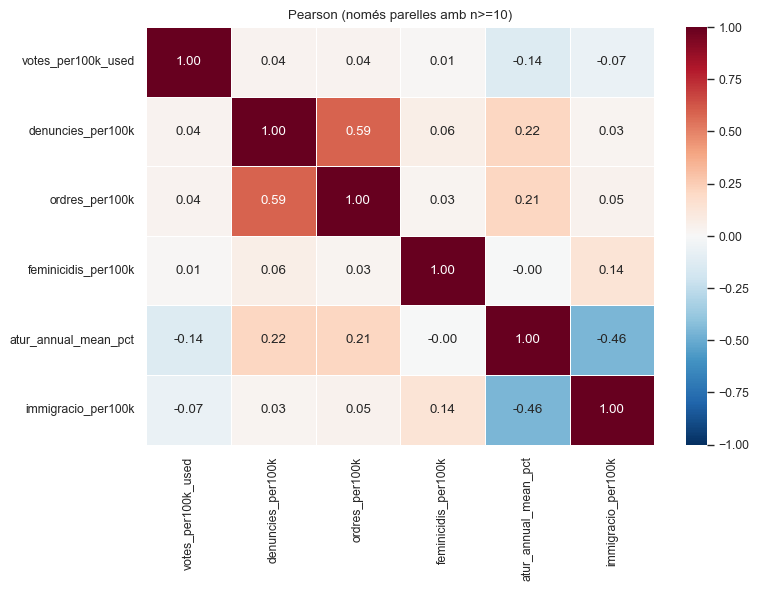

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

# construir matriu per plot (mantindrem NaN per valors amb pocs n)
plot_mat = pearson_r.copy().astype(float)
for a in plot_mat.index:
    for b in plot_mat.columns:
        if pearson_n.loc[a,b] < min_n:
            plot_mat.loc[a,b] = float("nan")

plt.figure(figsize=(8,6))
sns.heatmap(plot_mat, cmap="RdBu_r", center=0, annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Pearson (només parelles amb n>=%d)"%min_n)
plt.tight_layout()
plt.savefig(os.path.join(outdir, "pearson_heatmap_filtered.png"), dpi=300)
plt.show()

In [20]:
top_k = filtered.head(8) 
for _, row in top_k.iterrows():
    a,b = row["var1"], row["var2"]
    sub = df_obs[[a,b,"province_norm","year"]].dropna()
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=sub, x=a, y=b, hue="province_norm", legend=False, alpha=0.7)
    sns.regplot(data=sub, x=a, y=b, scatter=False, color="k", line_kws={"linewidth":1})
    plt.title(f"{a} vs {b}\nr={row['r']:.2f}, p={row['p']:.3g}, n={row['n_obs']}")
    plt.tight_layout()
    fname = f"scatter_{a}_vs_{b}.png".replace("/", "_")
    plt.savefig(os.path.join(outdir, fname), dpi=200)
    plt.close()

In [21]:
import numpy as np
import scipy.stats as st

def pearson_ci(r, n, alpha=0.05):
    if np.isnan(r) or n < 4:
        return (np.nan, np.nan)
    zr = np.arctanh(r)
    se = 1/np.sqrt(n-3)
    z = st.norm.ppf(1-alpha/2)
    lo = np.tanh(zr - z*se)
    hi = np.tanh(zr + z*se)
    return lo, hi

# afegir a filtered
filtered["pearson_ci_low"], filtered["pearson_ci_high"] = zip(*filtered.apply(lambda row: pearson_ci(row["r"], row["n_obs"]), axis=1))
filtered.to_csv(os.path.join(outdir, "pearson_pairs_with_ci.csv"), index=False)

In [22]:
table = filtered[["var1","var2","r","p","p_adj","n_obs","pearson_ci_low","pearson_ci_high","significant_fdr05"]]
table.to_csv(os.path.join(outdir, "pearson_results_for_report.csv"), index=False)

In [23]:
# Models de regressió OLS (simple i múltiple)
#  - regressions OLS simples (una variable explicativa cada cop),
#  - regressió OLS múltiple amb totes les variables,
#  - càlcul de VIF (col·linearitat),
#  - tests diagnòstics (Breusch-Pagan, Jarque-Bera),
#  - plots diagnòstics (residus vs ajustats, QQ, Cook's distance),
#  - desa resums i taules de coeficients a CSV i els gràfics a PNG.

# 1) Importar i paràmetres

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import jarque_bera
from statsmodels.graphics.gofplots import qqplot
from textwrap import dedent

sns.set(style="whitegrid", context="notebook")

# Paràmetres
OUTDIR = "output_ols"
os.makedirs(OUTDIR, exist_ok=True)

# Dependent i predictors
DEPENDENT = "votes_per100k_used"
PREDICTORS = [
    "denuncies_per100k",
    "ordres_per100k",
    "feminicidis_per100k",
    "atur_annual_mean_pct",
    "immigracio_per100k",
]

# Opcions
INCLUDE_YEAR_FE = False     
INCLUDE_PROV_FE = False    
MIN_OBS_FOR_MODEL = 10    

# 2) Carregar df_obs (les dades amb vots observats filtrades prèviament)

# Ruta del CSV creat anteriorment:
observed_csv = os.path.join("output_corr", "observed_votes_selected_vars.csv")
if os.path.exists(observed_csv):
    df_obs = pd.read_csv(observed_csv)
    print("Carregat df_obs des de:", observed_csv, "shape=", df_obs.shape)
else:
    raise FileNotFoundError(f"No trobat {observed_csv}. Assegura't d'haver creat el CSV de vots observats abans.")

# Assegurem tipus numèric per columns rellevants
for c in [DEPENDENT] + PREDICTORS:
    if c in df_obs.columns:
        df_obs[c] = pd.to_numeric(df_obs[c], errors="coerce")

# Mostrem nombres d'observacions per variable
print("NaNs per columna:")
print(df_obs[[DEPENDENT] + [p for p in PREDICTORS if p in df_obs.columns]].isna().sum())

# 3) Funcions generals: executar OLS, calcular VIF, guardar resultats i plots

def fit_ols(df, formula, robust_se=True):
    model = smf.ols(formula=formula, data=df).fit()
    return model

def summary_to_text(results):
    """Retorna string amb el summary del model."""
    return results.summary().as_text()

def coef_table(results):
    """Retorna DataFrame amb coeficients, stderr, t, p, CI."""
    params = results.params
    bse = results.bse
    t = results.tvalues
    p = results.pvalues
    conf = results.conf_int()
    dfc = pd.DataFrame({
        "coef": params,
        "std_err": bse,
        "t": t,
        "p": p,
        "ci_low": conf[0],
        "ci_high": conf[1]
    })
    return dfc

def calc_vif(df, features):
    """Calcula VIF per una llista de features (df ha d'estar net de NaN)."""
    X = df[features].dropna()
    X = sm.add_constant(X)
    vif_data = []
    for i, var in enumerate(X.columns):
        if var == "const":
            continue
        try:
            vif = variance_inflation_factor(X.values, i)
        except Exception:
            vif = np.nan
        vif_data.append({"variable": var, "VIF": vif})
    return pd.DataFrame(vif_data)

def save_model_outputs(name_prefix, results, df_model):
    """Guarda summary text, coef table CSV i diagnostics plots."""
    # Summary text
    summary_txt = summary_to_text(results)
    with open(os.path.join(OUTDIR, f"{name_prefix}_summary.txt"), "w", encoding="utf-8") as f:
        f.write(summary_txt)
    # Coeficients
    coefs = coef_table(results)
    coefs.to_csv(os.path.join(OUTDIR, f"{name_prefix}_coefs.csv"))
    # Diagnostics: residuals vs fitted, QQ, Cook's distance
    # Residuals vs fitted
    fitted = results.fittedvalues
    resid = results.resid
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=fitted, y=resid, alpha=0.6)
    plt.axhline(0, color="k", linestyle="--", linewidth=0.8)
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Fitted — {name_prefix}")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIR, f"{name_prefix}_resid_vs_fitted.png"), dpi=200)
    plt.close()
    # QQ plot
    plt.figure(figsize=(6,6))
    qqplot(resid, line="s", ax=plt.gca())
    plt.title(f"QQ plot residuals — {name_prefix}")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIR, f"{name_prefix}_qq.png"), dpi=200)
    plt.close()
    # Cook's distance
    infl = results.get_influence()
    cooks = infl.cooks_distance[0]
    plt.figure(figsize=(8,4))
    plt.stem(np.arange(len(cooks)), cooks, markerfmt=",", use_line_collection=True)
    plt.xlabel("Obs index")
    plt.ylabel("Cook's distance")
    plt.title(f"Cook's distance — {name_prefix}")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIR, f"{name_prefix}_cooks.png"), dpi=200)
    plt.close()

# 4) Regressions OLS simples (per cada predictor)

simple_results = []

for pred in PREDICTORS:
    if pred not in df_obs.columns:
        print(f"Atenció: predictor {pred} no trobat a df_obs; s'ometeix.")
        continue

    # Data per model: dropna només per dep + predictor
    df_model = df_obs[[DEPENDENT, pred, "province_norm", "year"]].dropna()
    n = len(df_model)
    if n < MIN_OBS_FOR_MODEL:
        print(f"Omited {pred}: només {n} observacions (< {MIN_OBS_FOR_MODEL})")
        continue

    # Formula (statsmodels afegeix intercept per defecte)
    formula = f"{DEPENDENT} ~ {pred}"
    if INCLUDE_YEAR_FE:
        formula += " + C(year)"
    if INCLUDE_PROV_FE:
        formula += " + C(province_norm)"

    # Ajustem el model
    res = fit_ols(df_model, formula=formula)
    prefix = f"simple_{pred}"
    save_model_outputs(prefix, res, df_model)

    # Tests diagnòstics addicionals
    # Breusch-Pagan (heteroscedasticitat)
    try:
        lm_stat, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(res.resid, res.model.exog)
    except Exception as e:
        lm_stat, lm_pvalue, fvalue, f_pvalue = np.nan, np.nan, np.nan, np.nan

    # Jarque‑Bera: la funció pot retornar 2 o 4 valors segons la versió de scipy
    try:
        jb_res = jarque_bera(res.resid)
        # jb_res pot ser (stat, p) o (stat, p, skew, kurt)
        if len(jb_res) >= 2:
            jb_stat, jb_p = jb_res[0], jb_res[1]
        else:
            jb_stat, jb_p = np.nan, np.nan
        if len(jb_res) >= 4:
            jb_skew, jb_kurt = jb_res[2], jb_res[3]
        else:
            jb_skew, jb_kurt = np.nan, np.nan
    except Exception:
        jb_stat, jb_p, jb_skew, jb_kurt = np.nan, np.nan, np.nan, np.nan

    # Afegim el resum d'aquest model a la llista
    simple_results.append({
        "predictor": pred,
        "n": n,
        "coef": res.params.get(pred, np.nan),
        "std_err": res.bse.get(pred, np.nan),
        "t": res.tvalues.get(pred, np.nan),
        "p": res.pvalues.get(pred, np.nan),
        "r_squared": res.rsquared,
        "r_squared_adj": res.rsquared_adj,
        "bp_lm": lm_stat,
        "bp_p": lm_pvalue,
        "jb_stat": jb_stat,
        "jb_p": jb_p,
        "jb_skew": jb_skew,
        "jb_kurt": jb_kurt
    })

    print(f"Fet simple OLS: {pred} (n={n}) — coef={res.params.get(pred):.4f}, p={res.pvalues.get(pred):.4g}")

# Convertim la llista a DataFrame i guardem
simple_df = pd.DataFrame(simple_results).sort_values(by="p")
simple_df.to_csv(os.path.join(OUTDIR, "simple_ols_summary.csv"), index=False)
print("Simple OLS summary guardat a:", os.path.join(OUTDIR, "simple_ols_summary.csv"))

Carregat df_obs des de: output_corr\observed_votes_selected_vars.csv shape= (1196, 8)
NaNs per columna:
votes_per100k_used        0
denuncies_per100k        52
ordres_per100k           52
feminicidis_per100k      52
atur_annual_mean_pct     52
immigracio_per100k      104
dtype: int64
Fet simple OLS: denuncies_per100k (n=1144) — coef=0.4006, p=0.22
Fet simple OLS: ordres_per100k (n=1144) — coef=1.3995, p=0.2343
Fet simple OLS: feminicidis_per100k (n=1144) — coef=501.7608, p=0.7867
Fet simple OLS: atur_annual_mean_pct (n=1144) — coef=-240.8211, p=1.832e-06
Fet simple OLS: immigracio_per100k (n=1092) — coef=-0.2305, p=0.03164
Simple OLS summary guardat a: output_ols\simple_ols_summary.csv


In [24]:
# 5) Regressió múltiple (totes les predictors)
# - Dropna en totes les variables del model

# Variables per al model múltiple
available_preds = [p for p in PREDICTORS if p in df_obs.columns]
model_vars = [DEPENDENT] + available_preds + ["province_norm", "year"]
df_model_multi = df_obs[[DEPENDENT] + available_preds + ["province_norm", "year"]].dropna()
n_multi = len(df_model_multi)
print("Observacions per model múltiple:", n_multi)
if n_multi >= MIN_OBS_FOR_MODEL:
    formula = DEPENDENT + " ~ " + " + ".join(available_preds)
    if INCLUDE_YEAR_FE:
        formula += " + C(year)"
    if INCLUDE_PROV_FE:
        formula += " + C(province_norm)"
    res_multi = fit_ols(df_model_multi, formula=formula)
    save_model_outputs("multiple_all_preds", res_multi, df_model_multi)

    # VIF: cal usar les variables explicatives (sense constant)
    try:
        vif_df = calc_vif(df_model_multi, available_preds)
        vif_df.to_csv(os.path.join(OUTDIR, "vif_multiple.csv"), index=False)
        print("VIF guardat a:", os.path.join(OUTDIR, "vif_multiple.csv"))
    except Exception as e:
        print("Error calculant VIF:", e)

    # Tests diagnòstics (robustos davant diferents versions de scipy)
    try:
        lm_stat, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(res_multi.resid, res_multi.model.exog)
    except Exception as e:
        print("Avís: Breusch-Pagan error:", e)
        lm_stat, lm_pvalue, fvalue, f_pvalue = np.nan, np.nan, np.nan, np.nan

    # Jarque‑Bera: pot retornar 2 o 4 valors segons la versió de scipy; tractem-ho tolerantment
    try:
        jb_res = jarque_bera(res_multi.resid)
        # jb_res pot ser (stat, p) o (stat, p, skew, kurt)
        jb_stat = jb_res[0] if len(jb_res) >= 1 else np.nan
        jb_p = jb_res[1] if len(jb_res) >= 2 else np.nan
        jb_skew = jb_res[2] if len(jb_res) >= 3 else np.nan
        jb_kurt = jb_res[3] if len(jb_res) >= 4 else np.nan
    except Exception as e:
        print("Avís: Jarque-Bera error:", e)
        jb_stat, jb_p, jb_skew, jb_kurt = np.nan, np.nan, np.nan, np.nan

    diag_multi = {
        "n": n_multi,
        "r2": res_multi.rsquared,
        "r2_adj": res_multi.rsquared_adj,
        "bp_lm": lm_stat,
        "bp_p": lm_pvalue,
        "jb_stat": jb_stat,
        "jb_p": jb_p,
        "jb_skew": jb_skew,
        "jb_kurt": jb_kurt
    }
    pd.Series(diag_multi).to_csv(os.path.join(OUTDIR, "multiple_model_diagnostics.csv"))
    print("Diagnostics multiple model guardats a:", os.path.join(OUTDIR, "multiple_model_diagnostics.csv"))

    # Guardar coeficients amb errors robusts (HC3)
    try:
        robust = res_multi.get_robustcov_results(cov_type="HC3")
        robust_bse = robust.bse
        coefs = coef_table(res_multi)
        coefs["robust_std_err"] = robust_bse
        coefs["robust_t"] = robust.params / robust_bse
        coefs["robust_p"] = robust.pvalues
        coefs.to_csv(os.path.join(OUTDIR, "multiple_coefs_with_robust_se.csv"))
        print("Coeficients (amb robust SE HC3) guardats a:", os.path.join(OUTDIR, "multiple_coefs_with_robust_se.csv"))
    except Exception as e:
        print("Avís: no s'han pogut calcular errors robusts:", e)
        # Guardem coeficients normals com fallback
        coefs = coef_table(res_multi)
        coefs.to_csv(os.path.join(OUTDIR, "multiple_coefs.csv"))
        print("Coeficients (sense robust SE) guardats a:", os.path.join(OUTDIR, "multiple_coefs.csv"))
else:
    print(f"No s'ajusta model múltiple: només {n_multi} observacions (< {MIN_OBS_FOR_MODEL})")

Observacions per model múltiple: 1092
VIF guardat a: output_ols\vif_multiple.csv
Diagnostics multiple model guardats a: output_ols\multiple_model_diagnostics.csv
Coeficients (amb robust SE HC3) guardats a: output_ols\multiple_coefs_with_robust_se.csv


In [25]:
# 6) Coeficients estandarditzats (beta) per al model múltiple
if n_multi >= MIN_OBS_FOR_MODEL:
    df_std = df_model_multi.copy()
    to_scale = [DEPENDENT] + available_preds
    df_std[to_scale] = df_std[to_scale].apply(lambda s: (s - s.mean()) / s.std(ddof=0))
    formula_std = DEPENDENT + " ~ " + " + ".join(available_preds)
    if INCLUDE_YEAR_FE:
        formula_std += " + C(year)"
    if INCLUDE_PROV_FE:
        formula_std += " + C(province_norm)"
    res_std = fit_ols(df_std, formula=formula_std)
    std_coefs = coef_table(res_std)
    std_coefs.to_csv(os.path.join(OUTDIR, "multiple_standardized_coefs.csv"))
    print("Coeficients estandarditzats guardats a multiple_standardized_coefs.csv")

Coeficients estandarditzats guardats a multiple_standardized_coefs.csv


In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.regressionplots import plot_ccpr, plot_partregress, influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence

sns.set(style="whitegrid", context="notebook")
OUTDIR = "output_ols"
os.makedirs(OUTDIR, exist_ok=True)

In [27]:
def savefig(fig, fname, dpi=200):
    out = os.path.join(OUTDIR, fname)
    fig.savefig(out, dpi=dpi, bbox_inches="tight")
    plt.close(fig)
    print("Desar:", out)

In [28]:
def plot_obs_vs_pred(results, df_model, name_prefix="model"):
    fitted = results.fittedvalues
    observed = df_model[results.model.endog_names]
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(observed, fitted, alpha=0.6)
    # línia 45°
    mn = min(observed.min(), fitted.min())
    mx = max(observed.max(), fitted.max())
    ax.plot([mn, mx], [mn, mx], color="k", linestyle="--", linewidth=1)
    ax.set_xlabel("Observat")
    ax.set_ylabel("Predit (fitted)")
    ax.set_title(f"Observed vs Predicted — {name_prefix}")
    savefig(fig, f"{name_prefix}_obs_vs_pred.png")

def plot_resid_vs_fitted(results, name_prefix="model"):
    fitted = results.fittedvalues
    resid = results.resid
    fig, ax = plt.subplots(figsize=(7,5))
    sns.scatterplot(x=fitted, y=resid, ax=ax, alpha=0.6)
    ax.axhline(0, color="k", linestyle="--", linewidth=0.8)
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals vs Fitted — {name_prefix}")
    savefig(fig, f"{name_prefix}_resid_vs_fitted.png")

In [29]:
def plot_qq_and_scaleloc(results, name_prefix="model"):
    resid = results.resid
    # QQ
    fig = qqplot(resid, line="s", fit=True)
    fig.set_size_inches(6,6)
    plt.title(f"QQ-plot residus — {name_prefix}")
    savefig(fig, f"{name_prefix}_qq.png")
    # Scale-Location
    fitted = results.fittedvalues
    std_resid = (resid - np.mean(resid)) / np.std(resid, ddof=1)
    y = np.sqrt(np.abs(std_resid))
    fig, ax = plt.subplots(figsize=(7,5))
    sns.scatterplot(x=fitted, y=y, ax=ax, alpha=0.6)
    sns.regplot(x=fitted, y=y, ax=ax, scatter=False, lowess=True, line_kws={"color":"k", "lw":1})
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Sqrt(|standardized residuals|)")
    ax.set_title(f"Scale-Location — {name_prefix}")
    savefig(fig, f"{name_prefix}_scale_location.png")

In [30]:
def plot_influence_and_cooks(results, name_prefix="model"):
    # Influence plot (leverage vs residuals^2)
    fig = plt.figure(figsize=(8,6))
    try:
        influence_plot(results, ax=plt.gca(), criterion="cooks")
        plt.title(f"Influence plot — {name_prefix}")
        savefig(fig, f"{name_prefix}_influence_plot.png")
    except Exception as e:
        print("influence_plot error:", e)
        plt.close(fig)

    # Cook's distance stem plot
    infl = OLSInfluence(results)
    cooks = infl.cooks_distance[0]
    fig, ax = plt.subplots(figsize=(10,4))
    markerline, stemlines, baseline = ax.stem(np.arange(len(cooks)), cooks, markerfmt=",", use_line_collection=True)
    ax.set_xlabel("Obs index")
    ax.set_ylabel("Cook's distance")
    ax.set_title(f"Cook's distance — {name_prefix}")
    # marcar límits típics (p>num_params/n)
    p = results.df_model + 1  # inclou intercept
    n = int(results.nobs)
    threshold = 4 / max(1, n)
    ax.axhline(threshold, color="red", linestyle="--", linewidth=0.8, label=f"4/n={threshold:.4f}")
    ax.legend()
    savefig(fig, f"{name_prefix}_cooks_stem.png")

In [31]:
def plot_partial_and_ccpr(results, df_model, predictors, name_prefix="model", max_plots=6):
    # per raons d'espai, limita a max_plots
    cnt = 0
    for pred in predictors:
        if cnt >= max_plots:
            break
        try:
            # partial regression plot
            fig = plt.figure(figsize=(7,5))
            ax = fig.add_subplot(111)
            plot_partregress(endog=results.model.endog_names, exog_i=pred, exog_others=[p for p in predictors if p!=pred],
                             data=df_model, ax=ax)
            ax.set_title(f"Regressió parcial (variable-afegida) — {pred}")
            savefig(fig, f"{name_prefix}_partregress_{pred}.png")
        except Exception as e:
            print("error de regressió parcial per a", pred, e)

        try:
            # CCPR (component + residual)
            fig = plt.figure(figsize=(7,5))
            ax = fig.add_subplot(111)
            plot_ccpr(results, pred, ax=ax)
            ax.set_title(f"CCPR (component+residual) — {pred}")
            savefig(fig, f"{name_prefix}_ccpr_{pred}.png")
        except Exception as e:
            print("ccpr error per", pred, e)

        cnt += 1

In [32]:
def plot_coefficients(results, robust_results=None, name_prefix="model"):
    """
    Dibuixar un forest plot dels coeficients amb IC95% i, si robust_results,
    afegir l'aproximació d'IC basada en errors robusts (reindexats per concordar).
    """
    # Params i IC normals
    params = results.params
    ci = results.conf_int()
    # Excloem l'Intercept
    coef_df = pd.DataFrame({
        "coef": params,
        "ci_lower": ci[0],
        "ci_upper": ci[1]
    }).drop(index=["Intercept"], errors="ignore")

    # Si disposem d'errors robusts, reindexem per ajustar a les mateixes variables
    if robust_results is not None:
        try:
            robust_se_full = robust_results.bse
            # Reindexar per l'índex de coef_df per evitar mismatch de longitud
            robust_se = robust_se_full.reindex(coef_df.index)
            robust_ci_low = robust_results.params.reindex(coef_df.index) - 1.96 * robust_se
            robust_ci_high = robust_results.params.reindex(coef_df.index) + 1.96 * robust_se
            coef_df["robust_se"] = robust_se
            coef_df["robust_ci_low"] = robust_ci_low
            coef_df["robust_ci_high"] = robust_ci_high
        except Exception as e:
            print("Avís: no s'han pogut afegir errors robusts al plot:", e)

    # Ordenar per coeficient per visual més clara
    coef_df = coef_df.sort_values("coef")

    # Plot
    fig, ax = plt.subplots(figsize=(6, max(4, 0.6*len(coef_df))))
    # línies d'error OLS
    err_low = coef_df["coef"] - coef_df["ci_lower"]
    err_high = coef_df["ci_upper"] - coef_df["coef"]
    ax.errorbar(coef_df["coef"], coef_df.index,
                xerr=[err_low.values, err_high.values],
                fmt="o", color="C0", label="OLS 95% CI", capsize=3)
    # errors robustos si existeixen
    if "robust_ci_low" in coef_df.columns and "robust_ci_high" in coef_df.columns:
        err_rob_low = (coef_df["coef"] - coef_df["robust_ci_low"]).values
        err_rob_high = (coef_df["robust_ci_high"] - coef_df["coef"]).values
        # dibuixar com quadrats i una mica translats verticalment
        ax.errorbar(coef_df["coef"], coef_df.index,
                    xerr=[err_rob_low, err_rob_high],
                    fmt="s", color="C1", alpha=0.8, label="Robust 95% CI", capsize=3)
    ax.axvline(0, color="k", linestyle="--")
    ax.set_xlabel("Coeficient")
    ax.set_title(f"Coeficients — {name_prefix}")
    ax.legend()
    # desar figura
    outpath = os.path.join(OUTDIR, f"{name_prefix}_coef_forest.png")
    fig.tight_layout()
    fig.savefig(outpath, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print("Dasat:", outpath)

In [33]:
def scatter_with_reg(df_model, x, y, hue=None, name_prefix="model"):
    sub = df_model[[x,y] + ([hue] if hue else [])].dropna()
    if sub.shape[0] < 8:
        print("Pocs punts per scatter:", x, y, sub.shape[0])
        return
    fig, ax = plt.subplots(figsize=(6,5))
    sns.scatterplot(data=sub, x=x, y=y, hue=hue, ax=ax, alpha=0.7, legend=False)
    sns.regplot(data=sub, x=x, y=y, scatter=False, ax=ax, color="k", line_kws={"linewidth":1})
    ax.set_title(f"{y} ~ {x}")
    savefig(fig, f"{name_prefix}_scatter_{x}_vs_{y}.png")

In [34]:
# Per model múltiple
try:
    plot_obs_vs_pred(res_multi, df_model_multi, name_prefix="multiple_all_preds")
    plot_resid_vs_fitted(res_multi, name_prefix="multiple_all_preds")
    plot_qq_and_scaleloc(res_multi, name_prefix="multiple_all_preds")
    plot_influence_and_cooks(res_multi, name_prefix="multiple_all_preds")
    # CCPR/partial per als predictors disponibles
    plot_partial_and_ccpr(res_multi, df_model_multi, predictors=available_preds, name_prefix="multiple_all_preds", max_plots=6)
    # Coef plot amb errors robusts si existeixen
    try:
        robust_multi = res_multi.get_robustcov_results(cov_type="HC3")
    except Exception:
        robust_multi = None
    plot_coefficients(res_multi, robust_results=robust_multi, name_prefix="multiple_all_preds")
except NameError:
    print("res_multi o df_model_multi no existeixen a la sessió.")

Desar: output_ols\multiple_all_preds_obs_vs_pred.png
Desar: output_ols\multiple_all_preds_resid_vs_fitted.png
Desar: output_ols\multiple_all_preds_qq.png
Desar: output_ols\multiple_all_preds_scale_location.png
Desar: output_ols\multiple_all_preds_influence_plot.png
Desar: output_ols\multiple_all_preds_cooks_stem.png
eval_env: 1
Desar: output_ols\multiple_all_preds_partregress_denuncies_per100k.png
Desar: output_ols\multiple_all_preds_ccpr_denuncies_per100k.png
eval_env: 1
Desar: output_ols\multiple_all_preds_partregress_ordres_per100k.png
Desar: output_ols\multiple_all_preds_ccpr_ordres_per100k.png
eval_env: 1
Desar: output_ols\multiple_all_preds_partregress_feminicidis_per100k.png
Desar: output_ols\multiple_all_preds_ccpr_feminicidis_per100k.png
eval_env: 1
Desar: output_ols\multiple_all_preds_partregress_atur_annual_mean_pct.png
Desar: output_ols\multiple_all_preds_ccpr_atur_annual_mean_pct.png
eval_env: 1
Desar: output_ols\multiple_all_preds_partregress_immigracio_per100k.png
Desar:

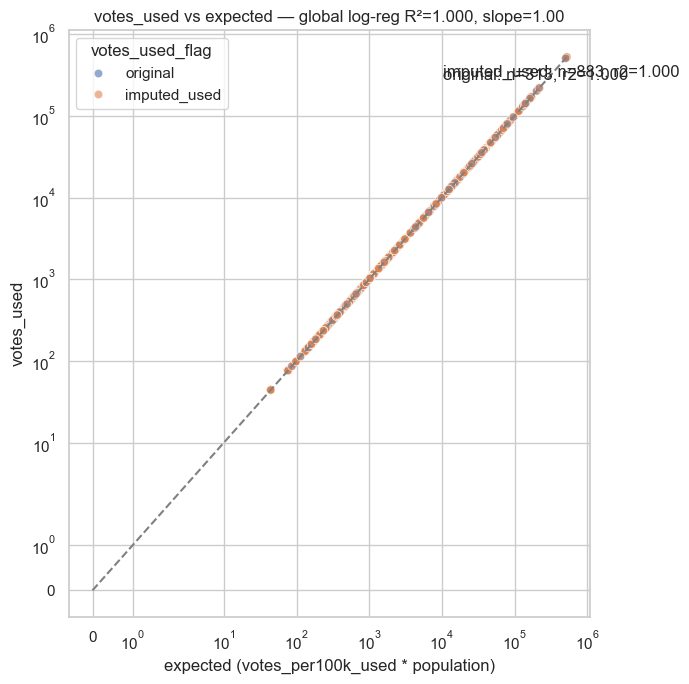

In [35]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# df amb columnes votes_used, votes_per100k_used, population, votes_used_flag
df['expected'] = df['votes_per100k_used'] * df['population'] / 100000.0
sub = df.dropna(subset=['votes_used','expected'])

# regressió global (transformació logarítmica per a la regressió a extrems de ponderació reduïda)
X = np.log1p(sub['expected']).values.reshape(-1,1)
y = np.log1p(sub['votes_used']).values
lr = LinearRegression().fit(X, y)
r2 = r2_score(y, lr.predict(X))
slope = lr.coef_[0]
intercept = lr.intercept_

# regression per flag
res_flag = {}
for flag, g in sub.groupby('votes_used_flag'):
    Xg = np.log1p(g['expected']).values.reshape(-1,1)
    yg = np.log1p(g['votes_used']).values
    if len(yg) >= 3:
        m = LinearRegression().fit(Xg, yg)
        res_flag[flag] = {'slope': m.coef_[0], 'intercept': m.intercept_,
                          'r2': r2_score(yg, m.predict(Xg)), 'n': len(yg)}
    else:
        res_flag[flag] = {'slope': np.nan, 'r2': np.nan, 'n': len(yg)}

# plot
plt.figure(figsize=(7,7))
sns.scatterplot(data=sub, x='expected', y='votes_used', hue='votes_used_flag', alpha=0.6)
maxv = max(sub['expected'].max(), sub['votes_used'].max())
plt.plot([0,maxv],[0,maxv], linestyle='--', color='grey')
plt.xscale('symlog'); plt.yscale('symlog')
plt.xlabel('expected (votes_per100k_used * population)')
plt.ylabel('votes_used')
plt.title(f'votes_used vs expected — global log-reg R²={r2:.3f}, slope={slope:.2f}')
# flag stats
ypos = maxv*0.6
for i,(flag,stats) in enumerate(res_flag.items()):
    txt = f"{flag}: n={stats['n']}, r2={stats.get('r2',np.nan):.3f}"
    plt.text(maxv*0.02, ypos*(0.95 - 0.08*i), txt)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
import statsmodels.formula.api as smf

# 1) Carregar el CSV a un DataFrame
path = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv" 
df = pd.read_csv(path)

cols = [
    "province_norm", "year",
    "denuncies_per100k",
    "votes_per100k_used",
    "atur_annual_mean_pct",
    "immigracio_per100k"
]

df_model = df[cols].dropna().copy()
print("N df_model:", len(df_model))

# 2) Verificar columnes disponibles
print(df.shape)
print(df.columns.tolist())
print(df.head(3))

m = smf.ols(
    "denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

print(m.summary())

N df_model: 1092
(1196, 29)
['province_norm', 'year', 'province', 'population', 'population_imputed_from_nearest', 'denuncies', 'denuncies_per100k', 'ordres', 'ordres_per100k', 'feminicidis', 'feminicidis_per100k', 'immigracio', 'immigracio_per100k', 'votes', 'votes_per100k', 'atur_annual_mean_pct', 'n_quarters', 'atur_used_pct', 'unemployed_est', 'unemployed_per100k', 'votes_final', 'votes_imputed_method', 'votes_combined', 'votes_source_observed_count', 'votes_imputed_flag', 'votes_original', 'votes_used', 'votes_used_flag', 'votes_per100k_used']
  province_norm  year  province  population  population_imputed_from_nearest  denuncies  denuncies_per100k  ordres  ordres_per100k  feminicidis  feminicidis_per100k  immigracio  immigracio_per100k  votes  \
0      a coruna  2000       NaN   1100954.0                             True        NaN                NaN     NaN             NaN          NaN                  NaN         NaN                 NaN  775.0   
1      a coruna  2003  A Coruna

In [37]:
m_cl = smf.ols(
    "denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_cl.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.389
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           4.81e-05
Time:                        12:39:48   Log-Likelihood:                -9185.3
No. Observations:                1092   AIC:                         1.838e+04
Df Residuals:                    1088   BIC:                         1.840e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1658.8777 

In [38]:
import statsmodels.formula.api as smf

# DENUNCIES
m_den_hc3 = smf.ols(
    "denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

m_den_cl = smf.ols(
    "denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_den_hc3.summary())
print(m_den_cl.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     46.98
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           1.50e-28
Time:                        12:39:48   Log-Likelihood:                -9185.3
No. Observations:                1092   AIC:                         1.838e+04
Df Residuals:                    1088   BIC:                         1.840e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1658.8777 

In [39]:
import statsmodels.formula.api as smf

formula_fe = "denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k + C(province_norm) + C(year)"

m_den_fe_hc3 = smf.ols(formula_fe, data=df_model).fit(cov_type="HC3")
print(m_den_fe_hc3.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     96.65
Date:                Sun, 21 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:39:48   Log-Likelihood:                -8410.1
No. Observations:                1092   AIC:                         1.697e+04
Df Residuals:                    1017   BIC:                         1.734e+04
Df Model:                          74                                         
Covariance Type:                  HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [40]:
m_den_fe_cl = smf.ols(formula_fe, data=df_model).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_model["province_norm"]}
)
print(m_den_fe_cl.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     351.4
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           2.52e-48
Time:                        12:39:48   Log-Likelihood:                -8410.1
No. Observations:                1092   AIC:                         1.697e+04
Df Residuals:                    1017   BIC:                         1.734e+04
Df Model:                          74                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 23
  warnings.warn('covariance of constraints does not have full '


In [41]:
df_model = df_model.copy()
df_model["province_norm"] = df_model["province_norm"].astype("category")
df_model["year"] = df_model["year"].astype("category")

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

OUTCOMES = ["denuncies_per100k", "ordres_per100k", "feminicidis_per100k"]
X_VARS = ["votes_per100k_used", "immigracio_per100k", "atur_annual_mean_pct"]
GROUP = "province_norm"

def fit_ols(df, y_col):
    cols = [y_col] + X_VARS + [GROUP]
    d = df[cols].copy()
    for c in [y_col] + X_VARS:
        d[c] = pd.to_numeric(d[c], errors="coerce")
    d = d.dropna()

    y = d[y_col].astype(float).values
    X = sm.add_constant(d[X_VARS].astype(float))
    groups = d[GROUP]

    res_cluster = sm.OLS(y, X).fit(cov_type="cluster", cov_kwds={"groups": groups})
    res_hc3     = sm.OLS(y, X).fit(cov_type="HC3")
    return d, res_cluster, res_hc3

# Per denúncies
df_model, res_cl, res_hc3 = fit_ols(df, "denuncies_per100k")
print("N:", len(df_model))
print(res_cl.summary())
print(res_hc3.summary())

N: 1092
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.389
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           4.81e-05
Time:                        12:39:48   Log-Likelihood:                -9185.3
No. Observations:                1092   AIC:                         1.838e+04
Df Residuals:                    1088   BIC:                         1.840e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 16

In [43]:
def tidy_cell(res, term):
    b  = res.params.get(term, np.nan)
    se = res.bse.get(term, np.nan)
    p  = res.pvalues.get(term, np.nan)
    return b, se, p

rows = ["votes_per100k_used", "immigracio_per100k", "atur_annual_mean_pct", "const"]
table = {}

for y in OUTCOMES:
    d, res_cl, res_hc3 = fit_ols(df, y)
    col = {}
    for r in rows:
        b,se,p = tidy_cell(res_cl, r if r != "const" else "const")
        col[r] = f"{b:.4f} ({se:.4f})"
    col["N"] = str(len(d))
    col["R2"] = f"{res_cl.rsquared:.3f}"
    table[y] = col

tab = pd.DataFrame(table).reindex(rows + ["N","R2"])
tab

,denuncies_per100k,ordres_per100k,feminicidis_per100k
votes_per100k_used,0.0076 (0.0060),0.0024 (0.0015),0.0000 (0.0000)
immigracio_per100k,0.0632 (0.0156),0.0191 (0.0046),0.0000 (0.0000)
atur_annual_mean_pct,51.1012 (9.9722),13.9671 (2.6049),0.0022 (0.0011)
const,1658.8777 (204.6712),437.8634 (50.5048),0.0759 (0.0191)
N,1092,1092,1092
R2,0.089,0.085,0.025


In [44]:
def save_summary(model, label, outpath=None, outdir="results_tables"):
    import os
    os.makedirs(outdir, exist_ok=True)
    if outpath is None:
        outpath = os.path.join(outdir, f"{label}.txt")

    with open(outpath, "w", encoding="utf-8") as f:
        f.write(str(model.summary()))

In [45]:
save_summary(m_den_fe_hc3, "denuncies_FE_HC3")
save_summary(m_den_fe_cl,  "denuncies_FE_CLUSTER")

In [46]:
# Després de fit()
print(m_den_fe_cl.wald_test("votes_per100k_used = 0"))

<Wald test (chi2): statistic=[[1.53763489]], p-value=0.21497019015155447, df_denom=1>


C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [47]:
import pandas as pd
import statsmodels.formula.api as smf

# 1) Carrega el CSV a un DataFrame
path = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv" 
df = pd.read_csv(path)

cols = [
    "province_norm", "year",
    "ordres_per100k",
    "votes_per100k_used",
    "atur_annual_mean_pct",
    "immigracio_per100k"
]

df_model = df[cols].dropna().copy()
print("N df_model:", len(df_model))

# 2) Verifica columnes disponibles
print(df.shape)
print(df.columns.tolist())
print(df.head(3))

m = smf.ols(
    "ordres_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

print(m.summary())

N df_model: 1092
(1196, 29)
['province_norm', 'year', 'province', 'population', 'population_imputed_from_nearest', 'denuncies', 'denuncies_per100k', 'ordres', 'ordres_per100k', 'feminicidis', 'feminicidis_per100k', 'immigracio', 'immigracio_per100k', 'votes', 'votes_per100k', 'atur_annual_mean_pct', 'n_quarters', 'atur_used_pct', 'unemployed_est', 'unemployed_per100k', 'votes_final', 'votes_imputed_method', 'votes_combined', 'votes_source_observed_count', 'votes_imputed_flag', 'votes_original', 'votes_used', 'votes_used_flag', 'votes_per100k_used']
  province_norm  year  province  population  population_imputed_from_nearest  denuncies  denuncies_per100k  ordres  ordres_per100k  feminicidis  feminicidis_per100k  immigracio  immigracio_per100k  votes  \
0      a coruna  2000       NaN   1100954.0                             True        NaN                NaN     NaN             NaN          NaN                  NaN         NaN                 NaN  775.0   
1      a coruna  2003  A Coruna

In [48]:
m_cl = smf.ols(
    "ordres_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_cl.summary())

                            OLS Regression Results                            
Dep. Variable:         ordres_per100k   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     10.31
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           2.07e-05
Time:                        12:39:48   Log-Likelihood:                -7810.3
No. Observations:                1092   AIC:                         1.563e+04
Df Residuals:                    1088   BIC:                         1.565e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              437.8634 

In [49]:
import statsmodels.formula.api as smf

# ORDRES DE PROTECCIO
m_ord_hc3 = smf.ols(
    "ordres_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

m_ord_cl = smf.ols(
    "ordres_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_ord_hc3.summary())
print(m_ord_cl.summary())

                            OLS Regression Results                            
Dep. Variable:         ordres_per100k   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     35.07
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           1.23e-21
Time:                        12:39:49   Log-Likelihood:                -7810.3
No. Observations:                1092   AIC:                         1.563e+04
Df Residuals:                    1088   BIC:                         1.565e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              437.8634 

In [50]:
import statsmodels.formula.api as smf

formula_fe = "ordres_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k + C(province_norm) + C(year)"

m_ord_fe_hc3 = smf.ols(formula_fe, data=df_model).fit(cov_type="HC3")
print(m_ord_fe_hc3.summary())

                            OLS Regression Results                            
Dep. Variable:         ordres_per100k   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     36.25
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          1.69e-234
Time:                        12:39:49   Log-Likelihood:                -7270.6
No. Observations:                1092   AIC:                         1.469e+04
Df Residuals:                    1017   BIC:                         1.507e+04
Df Model:                          74                                         
Covariance Type:                  HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [51]:
m_ord_fe_cl = smf.ols(formula_fe, data=df_model).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_model["province_norm"]}
)
print(m_ord_fe_cl.summary())

                            OLS Regression Results                            
Dep. Variable:         ordres_per100k   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           1.76e-44
Time:                        12:39:49   Log-Likelihood:                -7270.6
No. Observations:                1092   AIC:                         1.469e+04
Df Residuals:                    1017   BIC:                         1.507e+04
Df Model:                          74                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 23
  warnings.warn('covariance of constraints does not have full '


In [52]:
m_ord_fe_cl.t_test("votes_per100k_used = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0006      0.000      1.320      0.187      -0.000       0.001

In [53]:
save_summary(m_ord_fe_hc3, "ordres_FE_HC3")
save_summary(m_ord_fe_cl,  "ordres_FE_CLUSTER")

In [54]:
import pandas as pd
import statsmodels.formula.api as smf

# 1) Carregar el CSV a un DataFrame
path = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv" 
df = pd.read_csv(path)

cols = [
    "province_norm", "year",
    "feminicidis_per100k",
    "votes_per100k_used",
    "atur_annual_mean_pct",
    "immigracio_per100k"
]

df_model = df[cols].dropna().copy()
print("N df_model:", len(df_model))

# 2) Verificar columnes disponibles
print(df.shape)
print(df.columns.tolist())
print(df.head(3))

m = smf.ols(
    "feminicidis_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

print(m.summary())

N df_model: 1092
(1196, 29)
['province_norm', 'year', 'province', 'population', 'population_imputed_from_nearest', 'denuncies', 'denuncies_per100k', 'ordres', 'ordres_per100k', 'feminicidis', 'feminicidis_per100k', 'immigracio', 'immigracio_per100k', 'votes', 'votes_per100k', 'atur_annual_mean_pct', 'n_quarters', 'atur_used_pct', 'unemployed_est', 'unemployed_per100k', 'votes_final', 'votes_imputed_method', 'votes_combined', 'votes_source_observed_count', 'votes_imputed_flag', 'votes_original', 'votes_used', 'votes_used_flag', 'votes_per100k_used']
  province_norm  year  province  population  population_imputed_from_nearest  denuncies  denuncies_per100k  ordres  ordres_per100k  feminicidis  feminicidis_per100k  immigracio  immigracio_per100k  votes  \
0      a coruna  2000       NaN   1100954.0                             True        NaN                NaN     NaN             NaN          NaN                  NaN         NaN                 NaN  775.0   
1      a coruna  2003  A Coruna

In [55]:
m_cl = smf.ols(
    "feminicidis_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_cl.summary())

                             OLS Regression Results                            
Dep. Variable:     feminicidis_per100k   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.022
Method:                  Least Squares   F-statistic:                     10.94
Date:                 Sun, 21 Dec 2025   Prob (F-statistic):           1.17e-05
Time:                         12:39:49   Log-Likelihood:                 185.57
No. Observations:                 1092   AIC:                            -363.1
Df Residuals:                     1088   BIC:                            -343.2
Df Model:                            3                                         
Covariance Type:               cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [56]:
import statsmodels.formula.api as smf

# FEMINICIDIS
m_fem_hc3 = smf.ols(
    "feminicidis_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="HC3")

m_fem_cl = smf.ols(
    "feminicidis_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k",
    data=df_model
).fit(cov_type="cluster", cov_kwds={"groups": df_model["province_norm"]})

print(m_fem_hc3.summary())
print(m_fem_cl.summary())

                             OLS Regression Results                            
Dep. Variable:     feminicidis_per100k   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.022
Method:                  Least Squares   F-statistic:                     11.44
Date:                 Sun, 21 Dec 2025   Prob (F-statistic):           2.19e-07
Time:                         12:39:49   Log-Likelihood:                 185.57
No. Observations:                 1092   AIC:                            -363.1
Df Residuals:                     1088   BIC:                            -343.2
Df Model:                            3                                         
Covariance Type:                   HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [57]:
import statsmodels.formula.api as smf

formula_fe = "feminicidis_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k + C(province_norm) + C(year)"

m_fem_fe_hc3 = smf.ols(formula_fe, data=df_model).fit(cov_type="HC3")
print(m_fem_fe_hc3.summary())

                             OLS Regression Results                            
Dep. Variable:     feminicidis_per100k   R-squared:                       0.090
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     2.206
Date:                 Sun, 21 Dec 2025   Prob (F-statistic):           7.12e-08
Time:                         12:39:49   Log-Likelihood:                 223.30
No. Observations:                 1092   AIC:                            -296.6
Df Residuals:                     1017   BIC:                             78.08
Df Model:                           74                                         
Covariance Type:                   HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [58]:
m_fem_fe_cl = smf.ols(formula_fe, data=df_model).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_model["province_norm"]}
)
print(m_fem_fe_cl.summary())

                             OLS Regression Results                            
Dep. Variable:     feminicidis_per100k   R-squared:                       0.090
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     8.331
Date:                 Sun, 21 Dec 2025   Prob (F-statistic):           1.99e-10
Time:                         12:39:49   Log-Likelihood:                 223.30
No. Observations:                 1092   AIC:                            -296.6
Df Residuals:                     1017   BIC:                             78.08
Df Model:                           74                                         
Covariance Type:               cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 23
  warnings.warn('covariance of constraints does not have full '


In [59]:
m_fem_fe_cl.t_test("votes_per100k_used = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0          7.759e-07   1.64e-07      4.744      0.000    4.55e-07     1.1e-06

In [60]:
save_summary(m_fem_fe_hc3, "feminicidis_FE_HC3")
save_summary(m_fem_fe_cl,  "feminicidis_FE_CLUSTER")

In [61]:
from pathlib import Path
print("Treballant a:", Path.cwd())

Treballant a: C:\Users\bfeli


In [62]:
from pathlib import Path
import pandas as pd

OUT_DIR = Path("output_results")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def save_summary(model, stem: str, out_dir: Path = OUT_DIR):
    stem = stem.replace(" ", "_").replace("/", "_").replace("\\", "_").replace(":", "_")
    # TXT
    (out_dir / f"{stem}.txt").write_text(model.summary().as_text(), encoding="utf-8")
    # HTML
    (out_dir / f"{stem}.html").write_text(model.summary().as_html(), encoding="utf-8")

def save_coefs_csv(model, outcome: str, spec: str, out_dir: Path = OUT_DIR):
    # Taula coeficients “netes” per redactar
    ci = model.conf_int()
    dfc = pd.DataFrame({
        "outcome": outcome,
        "spec": spec,
        "term": model.params.index,
        "coef": model.params.values,
        "std_err": model.bse.values,
        "p_value": model.pvalues.values,
        "ci_low": ci.iloc[:, 0].values,
        "ci_high": ci.iloc[:, 1].values,
        "n": int(model.nobs),
        "r2": getattr(model, "rsquared", None),
        "adj_r2": getattr(model, "rsquared_adj", None),
    })
    fname = out_dir / f"coefs_{outcome}_{spec}.csv"
    dfc.to_csv(fname, index=False, encoding="utf-8")
    return dfc

In [63]:
all_tables = []

# Denúncies
save_summary(m_den_hc3, "denuncies_HC3")
save_summary(m_den_cl,  "denuncies_CLUSTER")
all_tables.append(save_coefs_csv(m_den_hc3, "denuncies_per100k", "HC3"))
all_tables.append(save_coefs_csv(m_den_cl,  "denuncies_per100k", "CLUSTER"))

# Ordres
save_summary(m_ord_hc3, "ordres_HC3")
save_summary(m_ord_cl,  "ordres_CLUSTER")
all_tables.append(save_coefs_csv(m_ord_hc3, "ordres_per100k", "HC3"))
all_tables.append(save_coefs_csv(m_ord_cl,  "ordres_per100k", "CLUSTER"))

# Feminicidis
save_summary(m_fem_hc3, "feminicidis_HC3")
save_summary(m_fem_cl,  "feminicidis_CLUSTER")
all_tables.append(save_coefs_csv(m_fem_hc3, "feminicidis_per100k", "HC3"))
all_tables.append(save_coefs_csv(m_fem_cl,  "feminicidis_per100k", "CLUSTER"))

# CSV consolidat
df_all = pd.concat(all_tables, ignore_index=True)
df_all.to_csv(OUT_DIR / "ALL_COEFS_OLS.csv", index=False, encoding="utf-8")

print("Desat a:", OUT_DIR.resolve())
print("Fitxers principals:", [p.name for p in OUT_DIR.glob("*")])

Desat a: C:\Users\bfeli\output_results
Fitxers principals: ['ALL_COEFS_ITS_DENUNCIES.csv', 'ALL_COEFS_OLS.csv', 'ALL_COEFS_OLS_PLUS_FE.csv', 'coefs_denuncies_per100k_CLUSTER.csv', 'coefs_denuncies_per100k_FE_CLUSTER.csv', 'coefs_denuncies_per100k_FE_HC3.csv', 'coefs_denuncies_per100k_HC3.csv', 'coefs_denuncies_per100k_ITS_2016_CLUSTER.csv', 'coefs_denuncies_per100k_ITS_2019_CLUSTER.csv', 'coefs_feminicidis_per100k_CLUSTER.csv', 'coefs_feminicidis_per100k_FE_CLUSTER.csv', 'coefs_feminicidis_per100k_FE_HC3.csv', 'coefs_feminicidis_per100k_HC3.csv', 'coefs_ordres_per100k_CLUSTER.csv', 'coefs_ordres_per100k_FE_CLUSTER.csv', 'coefs_ordres_per100k_FE_HC3.csv', 'coefs_ordres_per100k_HC3.csv', 'denuncies_CLUSTER.html', 'denuncies_CLUSTER.txt', 'denuncies_FE_CLUSTER.html', 'denuncies_FE_CLUSTER.txt', 'denuncies_FE_HC3.html', 'denuncies_FE_HC3.txt', 'denuncies_HC3.html', 'denuncies_HC3.txt', 'feminicidis_CLUSTER.html', 'feminicidis_CLUSTER.txt', 'feminicidis_FE_CLUSTER.html', 'feminicidis_FE_CLU

In [64]:
import pickle
import os

models = {
    "denuncies_HC3": m_den_hc3,
    "denuncies_CLUSTER": m_den_cl,
    "ordres_HC3": m_ord_hc3,
    "ordres_CLUSTER": m_ord_cl,
    "feminicidis_HC3": m_fem_hc3,
    "feminicidis_CLUSTER": m_fem_cl,
}

with open(os.path.join("output_results", "models_ols.pkl"), "wb") as f:
    pickle.dump(models, f)

In [65]:
with open(os.path.join("output_results", "models_ols.pkl"), "rb") as f:
    models = pickle.load(f)

In [66]:
import pandas as pd

df_all = pd.read_csv(r"C:\Users\bfeli\output_results\ALL_COEFS_OLS.csv")

subset = df_all[
    (df_all["term"] == "votes_per100k_used") &
    (df_all["outcome"].isin(["denuncies_per100k","ordres_per100k","feminicidis_per100k"])) &
    (df_all["spec"].isin(["CLUSTER","FE_CLUSTER"]))
][["outcome","spec","coef","std_err","p_value","ci_low","ci_high","n"]].sort_values(["outcome","spec"])

print(subset.to_string(index=False))

            outcome    spec         coef      std_err  p_value        ci_low      ci_high    n
  denuncies_per100k CLUSTER 7.611173e-03 5.971845e-03 0.202483 -4.093429e-03 1.931577e-02 1092
feminicidis_per100k CLUSTER 4.184575e-07 1.591233e-07 0.008544  1.065815e-07 7.303335e-07 1092
     ordres_per100k CLUSTER 2.370040e-03 1.480352e-03 0.109378 -5.313971e-04 5.271478e-03 1092


In [67]:
import pandas as pd
from pathlib import Path

base = Path(r"C:\Users\bfeli\output_results")

df_all = pd.read_csv(base / "ALL_COEFS_OLS.csv")

# Carrega dels FE desats
fe_files = [
    base / "coefs_denuncies_per100k_FE_CLUSTER.csv",
    base / "coefs_denuncies_per100k_FE_HC3.csv",
    base / "coefs_ordres_per100k_FE_CLUSTER.csv",
    base / "coefs_ordres_per100k_FE_HC3.csv",
    base / "coefs_feminicidis_per100k_FE_CLUSTER.csv",
    base / "coefs_feminicidis_per100k_FE_HC3.csv",
]

df_fe = pd.concat([pd.read_csv(f) for f in fe_files], ignore_index=True)

df_all2 = pd.concat([df_all, df_fe], ignore_index=True)
df_all2.to_csv(base / "ALL_COEFS_OLS_PLUS_FE.csv", index=False, encoding="utf-8")

print("Desat:", (base / "ALL_COEFS_OLS_PLUS_FE.csv"))
print(df_all2["spec"].value_counts())

Desat: C:\Users\bfeli\output_results\ALL_COEFS_OLS_PLUS_FE.csv
spec
FE_CLUSTER    225
FE_HC3        225
HC3            12
CLUSTER        12
Name: count, dtype: int64


In [68]:
df = pd.read_csv(base / "ALL_COEFS_OLS_PLUS_FE.csv")

subset = df[
    (df["term"] == "votes_per100k_used") &
    (df["outcome"].isin(["denuncies_per100k","ordres_per100k","feminicidis_per100k"])) &
    (df["spec"].isin(["CLUSTER","FE_CLUSTER"]))
][["outcome","spec","coef","std_err","p_value","ci_low","ci_high","n"]].sort_values(["outcome","spec"])

print(subset.to_string(index=False))

            outcome       spec          coef      std_err  p_value        ci_low      ci_high    n
  denuncies_per100k    CLUSTER  7.611173e-03 5.971845e-03 0.202483 -4.093429e-03 1.931577e-02 1092
  denuncies_per100k FE_CLUSTER -1.461509e-03 1.178623e-03 0.214970 -3.771567e-03 8.485494e-04 1092
feminicidis_per100k    CLUSTER  4.184575e-07 1.591233e-07 0.008544  1.065815e-07 7.303335e-07 1092
feminicidis_per100k FE_CLUSTER  7.758543e-07 1.635368e-07 0.000002  4.553281e-07 1.096381e-06 1092
     ordres_per100k    CLUSTER  2.370040e-03 1.480352e-03 0.109378 -5.313971e-04 5.271478e-03 1092
     ordres_per100k FE_CLUSTER  5.810832e-04 4.402138e-04 0.186834 -2.817201e-04 1.443886e-03 1092


In [69]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv(r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates.csv")

# Dataset analític (casos complets) per l’outcome
cols = ["province_norm","year","denuncies_per100k","votes_per100k_used","atur_annual_mean_pct","immigracio_per100k"]
d = df[cols].dropna().copy()

# time index (centra a l’any mínim per estabilitat numèrica)
t0 = d["year"].min()
d["time"] = d["year"] - t0

# Intervencions
d["post2004"] = (d["year"] >= 2004).astype(int)
d["timeAfter2004"] = (d["year"] - 2004) * d["post2004"]

d["post2019"] = (d["year"] >= 2019).astype(int)
d["timeAfter2019"] = (d["year"] - 2019) * d["post2019"]

# ITS panel amb FE província
formula = """
denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k
+ time
+ post2004 + timeAfter2004
+ post2019 + timeAfter2019
+ C(province_norm)
"""

m_its = smf.ols(formula, data=d).fit(
    cov_type="cluster", cov_kwds={"groups": d["province_norm"]}
)

print(m_its.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     389.8
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           5.89e-42
Time:                        12:39:50   Log-Likelihood:                -8492.8
No. Observations:                1092   AIC:                         1.710e+04
Df Residuals:                    1033   BIC:                         1.740e+04
Df Model:                          58                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

strong multicollinearity problems or that the design matrix is singular.


C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 59, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [70]:
import numpy as np
import statsmodels.formula.api as smf

d = df[["province_norm","year","denuncies_per100k","votes_per100k_used",
        "atur_annual_mean_pct","immigracio_per100k"]].dropna().copy()

t0 = d["year"].min()
d["time"] = d["year"] - t0

d["post2019"] = (d["year"] >= 2019).astype(int)
d["timeAfter2019"] = (d["year"] - 2019) * d["post2019"]

formula_2019 = """
denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k
+ time + post2019 + timeAfter2019
+ C(province_norm)
"""

m_2019 = smf.ols(formula_2019, data=d).fit(
    cov_type="cluster", cov_kwds={"groups": d["province_norm"]}
)
print(m_2019.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     448.1
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           2.68e-42
Time:                        12:39:50   Log-Likelihood:                -8509.8
No. Observations:                1092   AIC:                         1.714e+04
Df Residuals:                    1034   BIC:                         1.743e+04
Df Model:                          57                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 57, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [71]:
import numpy as np
import statsmodels.formula.api as smf

d = df[["province_norm","year","denuncies_per100k","votes_per100k_used",
        "atur_annual_mean_pct","immigracio_per100k"]].dropna().copy()

d["year"] = pd.to_numeric(d["year"])
t0 = d["year"].min()
d["time"] = d["year"] - t0

d["time_c"] = d["year"] - 2019
d["post2019"] = (d["year"] >= 2019).astype(int)
d["timeAfter2019"] = d["time_c"] * d["post2019"]

formula_2019 = """
denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k
+ time + post2019 + timeAfter2019
+ C(province_norm)
"""

m_2019 = smf.ols(formula_2019, data=d).fit(
    cov_type="cluster", cov_kwds={"groups": d["province_norm"]}
)
print(m_2019.summary())

                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     448.1
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           2.68e-42
Time:                        12:39:50   Log-Likelihood:                -8509.8
No. Observations:                1092   AIC:                         1.714e+04
Df Residuals:                    1034   BIC:                         1.743e+04
Df Model:                          57                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 57, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [72]:
import numpy as np
import statsmodels.formula.api as smf

d = df[["province_norm","year","denuncies_per100k","votes_per100k_used",
        "atur_annual_mean_pct","immigracio_per100k"]].dropna().copy()

d["year"] = pd.to_numeric(d["year"])
t0 = d["year"].min()
d["time"] = d["year"] - t0

# Centra el temps a 2016 per reduir col·linearitat (cond. number) i fer l’intercept interpretable:

d["time_c"] = d["year"] - 2016
d["post2016"] = (d["year"] >= 2016).astype(int)
d["timeAfter2016"] = d["time_c"] * d["post2016"]


formula_2016 = """
denuncies_per100k ~ votes_per100k_used + atur_annual_mean_pct + immigracio_per100k
+ time + post2016 + timeAfter2016
+ C(province_norm)
"""

m_2016 = smf.ols(formula_2016, data=d).fit(
    cov_type="cluster", cov_kwds={"groups": d["province_norm"]}
)
print(m_2016.summary())

C:\Users\bfeli\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 57, but rank is 6
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:      denuncies_per100k   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     423.8
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           1.08e-41
Time:                        12:39:50   Log-Likelihood:                -8516.3
No. Observations:                1092   AIC:                         1.715e+04
Df Residuals:                    1034   BIC:                         1.744e+04
Df Model:                          57                                         
Covariance Type:              cluster                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [73]:
print(d["year"].min(), d["year"].max(), d["year"].nunique())
print(d["post2016"].value_counts())

2003 2023 21
post2016
0    676
1    416
Name: count, dtype: int64


In [74]:
from pathlib import Path
import pandas as pd

OUT_DIR = Path(r"C:\Users\bfeli\output_results")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def save_summary(model, stem: str, out_dir: Path = OUT_DIR):
    stem = stem.replace(" ", "_").replace("/", "_").replace("\\", "_").replace(":", "_")
    (out_dir / f"{stem}.txt").write_text(model.summary().as_text(), encoding="utf-8")
    (out_dir / f"{stem}.html").write_text(model.summary().as_html(), encoding="utf-8")

def save_terms_csv(model, outcome: str, spec: str, terms: list, out_dir: Path = OUT_DIR):
    ci = model.conf_int()
    dfc = pd.DataFrame({
        "outcome": outcome,
        "spec": spec,
        "term": model.params.index,
        "coef": model.params.values,
        "std_err": model.bse.values,
        "p_value": model.pvalues.values,
        "ci_low": ci.iloc[:, 0].values,
        "ci_high": ci.iloc[:, 1].values,
        "n": int(model.nobs),
    })
    dfc = dfc[dfc["term"].isin(terms)].copy()
    dfc.to_csv(out_dir / f"coefs_{outcome}_{spec}.csv", index=False, encoding="utf-8")
    return dfc

# --- Desa ITS denúncies 2019 i 2016 (m_2019 i m_2016) ---
save_summary(m_2019, "ITS_denuncies_2019_CLUSTER")
save_summary(m_2016, "ITS_denuncies_2016_CLUSTER")

terms_2019 = ["post2019", "timeAfter2019", "time", "votes_per100k_used", "atur_annual_mean_pct", "immigracio_per100k"]
terms_2016 = ["post2016", "timeAfter2016", "time", "votes_per100k_used", "atur_annual_mean_pct", "immigracio_per100k"]

df_its_2019 = save_terms_csv(m_2019, "denuncies_per100k", "ITS_2019_CLUSTER", terms_2019)
df_its_2016 = save_terms_csv(m_2016, "denuncies_per100k", "ITS_2016_CLUSTER", terms_2016)

# Consolidat ITS
df_its_all = pd.concat([df_its_2019, df_its_2016], ignore_index=True)
df_its_all.to_csv(OUT_DIR / "ALL_COEFS_ITS_DENUNCIES.csv", index=False, encoding="utf-8")

print("Desat a:", OUT_DIR.resolve())
print("Fitxers ITS:", [p.name for p in OUT_DIR.glob("ITS_denuncies_*.*")])
print("CSV ITS:", "ALL_COEFS_ITS_DENUNCIES.csv")

Desat a: C:\Users\bfeli\output_results
Fitxers ITS: ['ITS_denuncies_2016_CLUSTER.html', 'ITS_denuncies_2016_CLUSTER.txt', 'ITS_denuncies_2019_CLUSTER.html', 'ITS_denuncies_2019_CLUSTER.txt']
CSV ITS: ALL_COEFS_ITS_DENUNCIES.csv


In [75]:
import pandas as pd
from pathlib import Path

base = Path(r"C:\Users\bfeli\output_results")
df = pd.read_csv(base / "ALL_COEFS_OLS_PLUS_FE.csv")  # o ALL_COEFS_OLS_PLUS_FE.csv

subset_vote = df[
    (df["term"] == "votes_per100k_used") &
    (df["outcome"].isin(["denuncies_per100k","ordres_per100k","feminicidis_per100k"])) &
    (df["spec"].isin(["CLUSTER","FE_CLUSTER"]))
][["outcome","spec","term","coef","std_err","p_value","ci_low","ci_high","n"]].sort_values(["outcome","spec"])

print(subset_vote.to_string(index=False))

            outcome       spec               term          coef      std_err  p_value        ci_low      ci_high    n
  denuncies_per100k    CLUSTER votes_per100k_used  7.611173e-03 5.971845e-03 0.202483 -4.093429e-03 1.931577e-02 1092
  denuncies_per100k FE_CLUSTER votes_per100k_used -1.461509e-03 1.178623e-03 0.214970 -3.771567e-03 8.485494e-04 1092
feminicidis_per100k    CLUSTER votes_per100k_used  4.184575e-07 1.591233e-07 0.008544  1.065815e-07 7.303335e-07 1092
feminicidis_per100k FE_CLUSTER votes_per100k_used  7.758543e-07 1.635368e-07 0.000002  4.553281e-07 1.096381e-06 1092
     ordres_per100k    CLUSTER votes_per100k_used  2.370040e-03 1.480352e-03 0.109378 -5.313971e-04 5.271478e-03 1092
     ordres_per100k FE_CLUSTER votes_per100k_used  5.810832e-04 4.402138e-04 0.186834 -2.817201e-04 1.443886e-03 1092


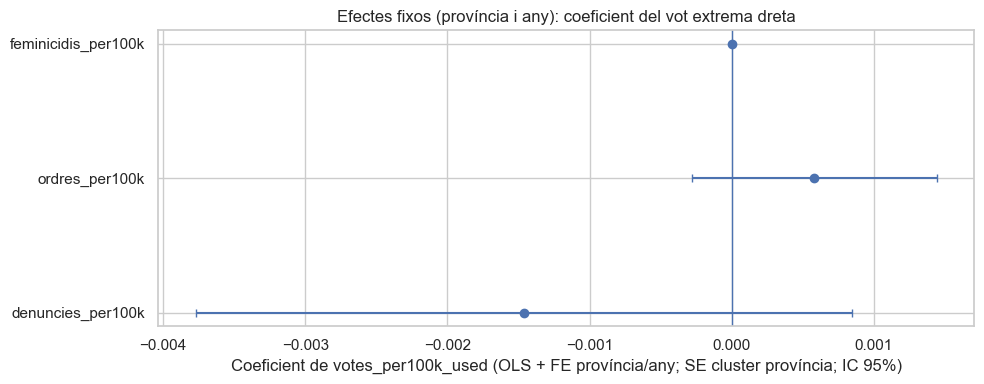

Saved: fig19_FE_coefplot_full.png


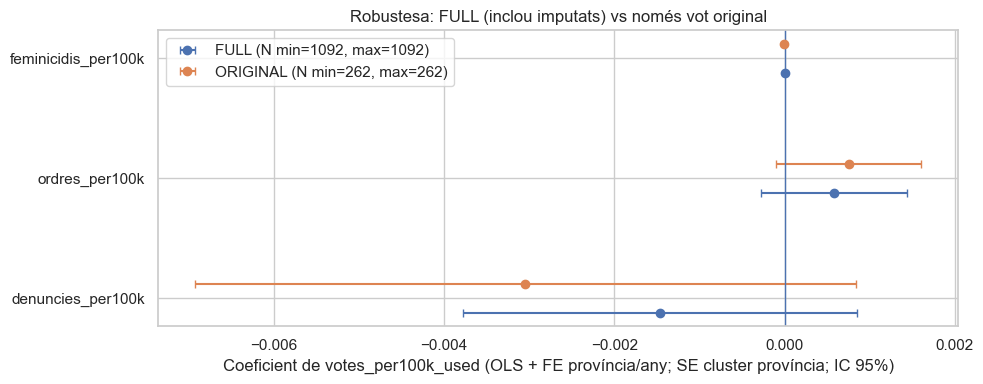

Saved: fig20_FE_robust_full_vs_original.png


In [76]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- Càrrega ---
PATH = r"C:\Users\bfeli\3 BBDD inicials\originals\Excels\partials_individuals\rates_all_metrics_by_province_year_unified_final_recomputed_rates_FIXED.csv"
VOTE = "votes_per100k_used"
FLAG = "votes_used_flag"
PROV = "province"
YEAR = "year"

# Ajustar
OUTCOMES = [
    "denuncies_per100k",
    "ordres_per100k",
    "feminicidis_per100k",
]
CONTROLS = [
    "unemployed_per100k",
    "immigracio_per100k",
]

# Fitxers de sortida
FIG19_OUT = "fig19_FE_coefplot_full.png"
FIG20_OUT = "fig20_FE_robust_full_vs_original.png"

# --- lectura ---
df = pd.read_csv(PATH)
df["is_imputed_vote"] = df[FLAG].astype(str).eq("imputed_used")

# --- PROCEDIMENTS GENERALS ---
def fit_fe_ols(data: pd.DataFrame, y: str):
    needed = [y, VOTE, PROV, YEAR] + CONTROLS
    d = data.dropna(subset=needed).copy()

    # FE província + FE any observat; SE cluster per província
    f = f"{y} ~ {VOTE} + " + " + ".join(CONTROLS) + f" + C({PROV}) + C({YEAR})"
    m = smf.ols(f, data=d).fit(cov_type="cluster", cov_kwds={"groups": d[PROV]})

    b = m.params[VOTE]
    se = m.bse[VOTE]
    ci_low = b - 1.96 * se
    ci_high = b + 1.96 * se
    return {"outcome": y, "N": len(d), "beta": b, "ci_low": ci_low, "ci_high": ci_high}

def coefplot(results_df: pd.DataFrame, title: str, xlabel: str, outpath: str):
    # Ordena OUTCOMES
    results_df = results_df.set_index("outcome").loc[OUTCOMES].reset_index()

    y_pos = np.arange(len(results_df))
    beta = results_df["beta"].to_numpy()
    lo = results_df["ci_low"].to_numpy()
    hi = results_df["ci_high"].to_numpy()

    plt.figure(figsize=(10, 4))
    plt.errorbar(
        beta,
        y_pos,
        xerr=[beta - lo, hi - beta],
        fmt="o",
        capsize=3,
    )
    plt.axvline(0, linewidth=1)
    plt.yticks(y_pos, results_df["outcome"])
    plt.xlabel(xlabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(outpath, dpi=300)
    plt.show()
    print("Saved:", outpath)

# --- FE coefplot (FULL sample, inclou imputats) ---
res_full = pd.DataFrame([fit_fe_ols(df, y) for y in OUTCOMES])

coefplot(
    res_full,
    title="Efectes fixos (província i any): coeficient del vot extrema dreta",
    xlabel="Coeficient de votes_per100k_used (OLS + FE província/any; SE cluster província; IC 95%)",
    outpath=FIG19_OUT
)

# --- Robustesa FE (FULL vs només vot original) ---
df_orig = df[df[FLAG].astype(str).eq("original")].copy()

res_orig = pd.DataFrame([fit_fe_ols(df_orig, y) for y in OUTCOMES])
res_full["sample"] = "FULL"
res_orig["sample"] = "ORIGINAL"
res_both = pd.concat([res_full, res_orig], ignore_index=True)

# Plot comparatiu (dos punts per outcome)
plt.figure(figsize=(10, 4))
y_base = np.arange(len(OUTCOMES))
offset = {"FULL": -0.12, "ORIGINAL": 0.12}

for sample in ["FULL", "ORIGINAL"]:
    sub = res_both[res_both["sample"] == sample].set_index("outcome").loc[OUTCOMES].reset_index()
    beta = sub["beta"].to_numpy()
    lo = sub["ci_low"].to_numpy()
    hi = sub["ci_high"].to_numpy()
    plt.errorbar(
        beta,
        y_base + offset[sample],
        xerr=[beta - lo, hi - beta],
        fmt="o",
        capsize=3,
        label=f"{sample} (N min={sub['N'].min()}, max={sub['N'].max()})"
    )

plt.axvline(0, linewidth=1)
plt.yticks(y_base, OUTCOMES)
plt.xlabel("Coeficient de votes_per100k_used (OLS + FE província/any; SE cluster província; IC 95%)")
plt.title("Robustesa: FULL (inclou imputats) vs només vot original")
plt.legend()
plt.tight_layout()
plt.savefig(FIG20_OUT, dpi=300)
plt.show()
print("Saved:", FIG20_OUT)

In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ---------------- Configuració ----------------
PATH = r"C:\Users\bfeli\rates_all_metrics_by_province_year_unified_final_recomputed_rates_FIXED.csv"
OUTDIR = "its_output"
os.makedirs(OUTDIR, exist_ok=True)

col = "denuncies"
s = df[col].dropna()

PROV_COL = "province_norm"   
YEAR_COL = "year"
POP_COL  = "population"

CONTROLS = ["atur_annual_mean_pct", "immigracio_per100k"]

# Dependent (denúncies i ordres)
Y_COL = "denuncies"      

BREAK1 = 2004
BREAK2 = 2019
RATE_SCALE = 100000

B = 300  # bootstrap draws (cluster per província)
RNG_SEED = 42

FIG_ITS = os.path.join(OUTDIR, f"ITS_{Y_COL}_{BREAK1}_{BREAK2}.png")
CSV_SUM = os.path.join(OUTDIR, f"ITS_{Y_COL}_summary.csv")

# ---------------- Lectura ----------------
df = pd.read_csv(PATH)

need = [PROV_COL, YEAR_COL, POP_COL, Y_COL] + CONTROLS
missing = [c for c in need if c not in df.columns]
if missing:
    raise KeyError(f"Falten columnes: {missing}")

d = df[need].copy()
d[YEAR_COL] = pd.to_numeric(d[YEAR_COL], errors="coerce").astype("Int64")

# Temps i segments
min_year = d[YEAR_COL].min()
d["t"] = d[YEAR_COL] - min_year

d["post_2004"] = (d[YEAR_COL] >= BREAK1).astype(int)
d["t_post_2004"] = (d[YEAR_COL] - BREAK1).clip(lower=0)

d["post_2019"] = (d[YEAR_COL] >= BREAK2).astype(int)
d["t_post_2019"] = (d[YEAR_COL] - BREAK2).clip(lower=0)

# forçar a numèrics
for c in [Y_COL, POP_COL] + CONTROLS:
    d[c] = pd.to_numeric(d[c], errors="coerce")

# dependent com a recompte enter (nullable fins al dropna)
d[Y_COL] = d[Y_COL].round().astype("Int64")

# població positiva
d.loc[d[POP_COL] <= 0, POP_COL] = np.nan

REQ = [PROV_COL, YEAR_COL, POP_COL, Y_COL,
       "t", "post_2004", "t_post_2004", "post_2019", "t_post_2019"] + CONTROLS

d_model = d[REQ].dropna().copy()
print("d_model shape:", d_model.shape)

d_model shape: (1092, 11)


In [78]:
irr_t = 0.332282
irr_post04_slope = irr_t * 3.149392
irr_post19_slope = irr_post04_slope * 0.982808

print("IRR pendent pre-2004:", irr_t)
print("IRR pendent post-2004:", irr_post04_slope)
print("IRR pendent post-2019:", irr_post19_slope)

print("% anual pre-2004:", (irr_t-1)*100)
print("% anual post-2004:", (irr_post04_slope-1)*100)
print("% anual post-2019:", (irr_post19_slope-1)*100)

IRR pendent pre-2004: 0.332282
IRR pendent post-2004: 1.046486272544
IRR pendent post-2019: 1.0284950805464237
% anual pre-2004: -66.7718
% anual post-2004: 4.648627254400006
% anual post-2019: 2.849508054642369


In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

# ---------------- Configuració ----------------
PATH = r"C:\Users\bfeli\rates_all_metrics_by_province_year_unified_final_recomputed_rates_FIXED.csv" 
OUTDIR = "figures_results_ch4"
os.makedirs(OUTDIR, exist_ok=True)

PROV_COL = "province"
YEAR_COL = "year"
POP_COL  = "population"

VOTE_RATE_COL = "votes_per100k_used" 

RATE_SCALE = 100000

# Candidats per outcomes
OUTCOMES = {
    "denuncies": {
        "count_candidates": ["denuncies", "denuncies_count"],
        "rate_candidates":  ["denuncies_per100k", "denuncies_rate_per100k"]
    },
    "ordres": {
        "count_candidates": ["ordres", "ordres_count"],
        "rate_candidates":  ["ordres_per100k", "ordres_rate_per100k"]
    },
    "feminicidis": {
        "count_candidates": ["feminicidis", "feminicidis_count"],
        "rate_candidates":  ["feminicidis_per100k", "feminicidis_rate_per100k"]
    }
}

def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

# ---------------- Càrrega de dades ----------------
df = pd.read_csv(PATH)
df = ensure_numeric(df, [YEAR_COL, POP_COL, VOTE_RATE_COL])

# sanity
df = df.dropna(subset=[YEAR_COL, POP_COL]).copy()
df[YEAR_COL] = df[YEAR_COL].astype(int)
df[POP_COL] = df[POP_COL].astype(float)

years_all = np.sort(df[YEAR_COL].unique())

# ---------------- F4.2: Sèrie temporal agregada per outcome (taxa ponderada per població).---------------
def agg_weighted_rate(data, count_col, pop_col=POP_COL):
    g = data.groupby(YEAR_COL, as_index=False).agg(
        total_y=(count_col, "sum"),
        total_pop=(pop_col, "sum")
    )
    g["rate_per100k"] = (g["total_y"] / g["total_pop"]) * RATE_SCALE
    return g.sort_values(YEAR_COL)

for outcome, meta in OUTCOMES.items():
    count_col = pick_col(df, meta["count_candidates"])
    if count_col is None:
        raise KeyError(f"No trobo columna de recompte per a {outcome}: {meta['count_candidates']}")

    df = ensure_numeric(df, [count_col])
    g = agg_weighted_rate(df.dropna(subset=[count_col, POP_COL]), count_col)

    fig, ax = plt.subplots(figsize=(9.5, 4.8))
    x = g[YEAR_COL].values.astype(float)
    y = g["rate_per100k"].values.astype(float)

    ax.plot(x, y, marker="o", linewidth=1.8)
    ax.set_title(f"F4.2 — {outcome.capitalize()}: taxa agregada ponderada per població")
    ax.set_xlabel("Any")
    ax.set_ylabel("Taxa per 100.000 habitants (agregada ponderada)")

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.grid(True, axis="y", linestyle=":", linewidth=0.6)

    fig.tight_layout()
    out = os.path.join(OUTDIR, f"F4_2_timeseries_{outcome}_weighted.png")
    fig.savefig(out, dpi=300, bbox_inches="tight")
    plt.close(fig)

    print("Saved:", out)

# ---------------- F4.3: Sèrie temporal del vot (punts en anys amb vot observat + opcional LOCF) ----------------
def agg_vote_weighted(data, rate_col=VOTE_RATE_COL):
    d = data.dropna(subset=[rate_col, POP_COL]).copy()
    d["implied_votes"] = d[rate_col].astype(float) * d[POP_COL].astype(float) / RATE_SCALE
    g = d.groupby(YEAR_COL, as_index=False).agg(
        votes_total=("implied_votes", "sum"),
        pop_total=(POP_COL, "sum")
    )
    g["vote_rate_per100k"] = (g["votes_total"] / g["pop_total"]) * RATE_SCALE
    return g.sort_values(YEAR_COL)

# punts: només anys on s'observa el vot (contribueix el que no és NaN a nivell de província)
vote_points = agg_vote_weighted(df)

# LOCF sèrie LOCF: emplenar directament per província durant els anys observats al conjunt de dades com a línia (descriptiu)
df_locf = df.sort_values([PROV_COL, YEAR_COL]).copy()
df_locf[VOTE_RATE_COL] = df_locf.groupby(PROV_COL)[VOTE_RATE_COL].ffill()
vote_locf = agg_vote_weighted(df_locf)

fig, ax = plt.subplots(figsize=(9.5, 4.8))

# LOCF com a línia (descriptiu)
xL = vote_locf[YEAR_COL].values.astype(float)
yL = vote_locf["vote_rate_per100k"].values.astype(float)
ax.plot(xL, yL, linewidth=1.8, linestyle="-", label="Vot (LOCF, descriptiu)")

# punts observats
xP = vote_points[YEAR_COL].values.astype(float)
yP = vote_points["vote_rate_per100k"].values.astype(float)
ax.scatter(xP, yP, s=35, label="Vot observat (anys amb dades)")

ax.set_title("F4.3 — Vot extrema dreta: punts en anys observats i sèrie LOCF (descriptiva)")
ax.set_xlabel("Any")
ax.set_ylabel("Vot per 100.000 habitants (agregat ponderat)")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid(True, axis="y", linestyle=":", linewidth=0.6)
ax.legend()

fig.tight_layout()
out = os.path.join(OUTDIR, "F4_3_vote_timeseries_points_plus_LOCF.png")
fig.savefig(out, dpi=300, bbox_inches="tight")
plt.close(fig)
print("Desat:", out)

# ---------------- F4.4: Distribucions (histogrames i boxplot) per evidenciar asimetria.
rate_cols = {}
for outcome, meta in OUTCOMES.items():
    rc = pick_col(df, meta["rate_candidates"])
    cc = pick_col(df, meta["count_candidates"])
    rate_cols[outcome] = rc if rc is not None else cc

# Histogrames
for outcome, col in rate_cols.items():
    if col is None:
        continue
    df = ensure_numeric(df, [col])
    v = df[col].dropna().astype(float).values

    fig, ax = plt.subplots(figsize=(7.8, 4.6))
    ax.hist(v, bins=40, alpha=0.85)
    ax.set_title(f"F4.4 — Distribució de {outcome} ({col})")
    ax.set_xlabel(col)
    ax.set_ylabel("Freqüència")
    ax.grid(True, axis="y", linestyle=":", linewidth=0.6)

    fig.tight_layout()
    out = os.path.join(OUTDIR, f"F4_4_hist_{outcome}.png")
    fig.savefig(out, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print("Desat:", out)

# Boxplot comparatiu
vals = []
labels = []
for outcome, col in rate_cols.items():
    if col is None:
        continue
    vv = df[col].dropna().astype(float).values
    if len(vv) == 0:
        continue
    vals.append(vv)
    labels.append(outcome)

fig, ax = plt.subplots(figsize=(8.5, 4.8))
ax.boxplot(vals, labels=labels, showfliers=True)
ax.set_title("F4.4 — Boxplot comparatiu dels outcomes (escala original)")
ax.set_xlabel("Outcome")
ax.set_ylabel("Valor (taxa per 100k o recompte, segons columna disponible)")
ax.grid(True, axis="y", linestyle=":", linewidth=0.6)

fig.tight_layout()
out = os.path.join(OUTDIR, "F4_4_boxplot_outcomes.png")
fig.savefig(out, dpi=300, bbox_inches="tight")
plt.close(fig)
print("Desat:", out)

Saved: figures_results_ch4\F4_2_timeseries_denuncies_weighted.png
Saved: figures_results_ch4\F4_2_timeseries_ordres_weighted.png
Saved: figures_results_ch4\F4_2_timeseries_feminicidis_weighted.png
Desat: figures_results_ch4\F4_3_vote_timeseries_points_plus_LOCF.png
Desat: figures_results_ch4\F4_4_hist_denuncies.png
Desat: figures_results_ch4\F4_4_hist_ordres.png
Desat: figures_results_ch4\F4_4_hist_feminicidis.png
Desat: figures_results_ch4\F4_4_boxplot_outcomes.png


In [80]:
import os
import numpy as np
import pandas as pd

PATH = r"C:\Users\bfeli\rates_all_metrics_by_province_year_unified_final_recomputed_rates_FIXED.csv"
OUTDIR = "figures_results_ch4"
os.makedirs(OUTDIR, exist_ok=True)

PROV_COL = "province"
YEAR_COL = "year"

# Variables clau
VOTE = "votes_per100k_used"
CONTROLS = ["immigracio_per100k", "atur_annual_mean_pct"]

# Outcomes (rates per descriptiu/OLS) i counts (per Poisson/NB)
OUTCOME_RATES = {
    "Denúncies (taxa)": "denuncies_per100k",
    "Ordres (taxa)": "ordres_per100k",
    "Feminicidis (taxa)": "feminicidis_per100k",
}
OUTCOME_COUNTS = {
    "Denúncies (recompte)": "denuncies",
    "Ordres (recompte)": "ordres",
    "Feminicidis (recompte)": "feminicidis",
}
POP = "population"

df = pd.read_csv(PATH)
df[YEAR_COL] = pd.to_numeric(df[YEAR_COL], errors="coerce").astype("Int64")

In [81]:
def sample_stats(dsub: pd.DataFrame):
    dsub = dsub.dropna(subset=[PROV_COL, YEAR_COL]).copy()
    n = len(dsub)
    n_prov = dsub[PROV_COL].nunique(dropna=True)
    years = dsub[YEAR_COL].dropna().astype(int)
    if len(years) == 0:
        period = ""
    else:
        ys = sorted(years.unique())
        period = f"{ys[0]}–{ys[-1]} (anys observats: {len(ys)})"
    return n, n_prov, period

def complete_case(df, cols):
    return df.dropna(subset=cols).copy()

In [82]:
rows = []

# --- Correlacions (Pearson / Spearman): pairwise complete (no és un únic N) ---

d_vote = df.dropna(subset=[PROV_COL, YEAR_COL, VOTE]).copy()
n, nprov, period = sample_stats(d_vote)
rows.append({
    "Model / especificació": "Correlacions (Pearson/Spearman)",
    "Outcome": "Outcomes + vot",
    "Període": period,
    "N observacions": "Variable (pairwise complete)",
    "N províncies": nprov,
    "Notes": "Parelles completes; N varia per parella. Vot disponible només quan no és NaN."
})

# --- OLS amb controls (per cada outcome en taxa) ---
for out_name, out_col in OUTCOME_RATES.items():
    cols = [PROV_COL, YEAR_COL, out_col, VOTE] + CONTROLS
    dsub = complete_case(df, cols)
    n, nprov, period = sample_stats(dsub)
    rows.append({
        "Model / especificació": "OLS (controls)",
        "Outcome": out_name,
        "Període": period,
        "N observacions": n,
        "N províncies": nprov,
        "Notes": "Complete-case; SE robustos (si aplica)."
    })

# --- Models amb efectes fixos (lineal FE: província + any) ---
for out_name, out_col in OUTCOME_RATES.items():
    cols = [PROV_COL, YEAR_COL, out_col, VOTE] + CONTROLS
    dsub = complete_case(df, cols)
    n, nprov, period = sample_stats(dsub)
    rows.append({
        "Model / especificació": "FE (província + any)",
        "Outcome": out_name,
        "Període": period,
        "N observacions": n,
        "N províncies": nprov,
        "Notes": "Complete-case; FE província i any (anys observats)."
    })

# --- Poisson/NB amb offset i FE (per recompte) ---
for out_name, out_col in OUTCOME_COUNTS.items():
    cols = [PROV_COL, YEAR_COL, out_col, POP, VOTE] + CONTROLS
    dsub = complete_case(df, cols)
    n, nprov, period = sample_stats(dsub)
    rows.append({
        "Model / especificació": "Poisson/NB (offset) + FE",
        "Outcome": out_name,
        "Període": period,
        "N observacions": n,
        "N províncies": nprov,
        "Notes": "Complete-case; offset log(població); FE província i any (si aplica); IRR."
    })

# --- ITS (aprox.) per denúncies (recompte) ---
cols = [PROV_COL, YEAR_COL, "denuncies", POP] + CONTROLS 
dsub = complete_case(df, cols)
n, nprov, period = sample_stats(dsub)
rows.append({
    "Model / especificació": "ITS (regressió segmentada; Poisson + offset)",
    "Outcome": "Denúncies (recompte)",
    "Període": period,
    "N observacions": n,
    "N províncies": nprov,
    "Notes": "Complete-case; FE província; punts d’inflexió 2004 i 2019; bootstrap per província (B=300)."
})

t41 = pd.DataFrame(rows)
t41

,Model / especificació,Outcome,Període,N observacions,N províncies,Notes
0,Correlacions (Pearson/Spearman),Outcomes + vot,2000–2024 (anys observats: 23),Variable (pairwise complete),52,Parelles completes; N varia per parella. Vot d...
1,OLS (controls),Denúncies (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; SE robustos (si aplica).
2,OLS (controls),Ordres (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; SE robustos (si aplica).
3,OLS (controls),Feminicidis (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; SE robustos (si aplica).
4,FE (província + any),Denúncies (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; FE província i any (anys observ...
5,FE (província + any),Ordres (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; FE província i any (anys observ...
6,FE (província + any),Feminicidis (taxa),2003–2023 (anys observats: 21),1092,52,Complete-case; FE província i any (anys observ...
7,Poisson/NB (offset) + FE,Denúncies (recompte),2003–2023 (anys observats: 21),1092,52,Complete-case; offset log(població); FE provín...
8,Poisson/NB (offset) + FE,Ordres (recompte),2003–2023 (anys observats: 21),1092,52,Complete-case; offset log(població); FE provín...
9,Poisson/NB (offset) + FE,Feminicidis (recompte),2003–2023 (anys observats: 21),1092,52,Complete-case; offset log(població); FE provín...


In [83]:
csv_out = os.path.join(OUTDIR, "T4_1_mostra_analitica_per_model.csv")
t41.to_csv(csv_out, index=False)

print("Desat:", csv_out)

Desat: figures_results_ch4\T4_1_mostra_analitica_per_model.csv


In [84]:
def add_row(model, outcome_label, cols_needed, notes):
    dsub = df.dropna(subset=cols_needed).copy()
    n = len(dsub)
    nprov = dsub[PROV_COL].nunique()
    ys = sorted(dsub[YEAR_COL].dropna().astype(int).unique())
    period = f"{ys[0]}–{ys[-1]} (anys observats: {len(ys)})" if ys else ""
    rows.append({
        "Model / especificació": model,
        "Outcome": outcome_label,
        "Període": period,
        "N observacions": n,
        "N províncies": nprov,
        "Notes": notes
    })

# --- OLS (taxes) per 3 outcomes ---
for lab, col in OUTCOME_RATES.items():
    add_row(
        model="OLS (controls)",
        outcome_label=f"{lab} — TAXA (per 100k)",
        cols_needed=[PROV_COL, YEAR_COL, col, VOTE] + CONTROLS,
        notes="Complete-case; dependent en taxa; SE robustos (si aplica)."
    )

# --- FE lineal per 3 outcomes ---
for lab, col in OUTCOME_RATES.items():
    add_row(
        model="FE (província + any)",
        outcome_label=f"{lab} — TAXA (per 100k)",
        cols_needed=[PROV_COL, YEAR_COL, col, VOTE] + CONTROLS,
        notes="Complete-case; dependent en taxa; FE província+any (anys observats)."
    )

# --- Poisson/NB per 3 outcomes (recompte + offset) ---
for lab, col in OUTCOME_COUNTS.items():
    add_row(
        model="Poisson/NB (offset) + FE",
        outcome_label=f"{lab} — RECOMPTE + offset log(població)",
        cols_needed=[PROV_COL, YEAR_COL, col, POP, VOTE] + CONTROLS,
        notes="Complete-case; IRR; offset log(població); FE segons especificació."
    )

In [85]:
import os
import numpy as np
import pandas as pd

PATH = r"C:\Users\bfeli\rates_all_metrics_by_province_year_unified_final_recomputed_rates_FIXED.csv"
OUTDIR = "figures_results_ch4"
os.makedirs(OUTDIR, exist_ok=True)

PROV_COL = "province"
YEAR_COL = "year"

# Taxes (descriptiu)
OUTCOME_RATES = {
    "Denúncies (per 100k)": "denuncies_per100k",
    "Ordres (per 100k)": "ordres_per100k",
    "Feminicidis (per 100k)": "feminicidis_per100k"
}

df = pd.read_csv(PATH)
df[YEAR_COL] = pd.to_numeric(df[YEAR_COL], errors="coerce").astype("Int64")

def desc_stats(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    return pd.Series({
        "n": int(s.shape[0]),
        "mean": float(s.mean()),
        "p25": float(s.quantile(0.25)),
        "median": float(s.median()),
        "p75": float(s.quantile(0.75)),
        "sd": float(s.std(ddof=1)),
        "min": float(s.min()),
        "max": float(s.max())
    })

table = []
for label, col in OUTCOME_RATES.items():
    if col not in df.columns:
        raise KeyError(f"Falta columna: {col}")
    stats = desc_stats(df[col])
    stats["outcome"] = label
    table.append(stats)

t42 = pd.DataFrame(table)[["outcome","n","mean","p25","median","p75","sd","min","max"]]

# arrodoniment
t42_rounded = t42.copy()
for c in ["mean","p25","median","p75","sd","min","max"]:
    t42_rounded[c] = t42_rounded[c].round(3)

csv_out = os.path.join(OUTDIR, "T4_2_descriptius_outcomes_rates.csv")
md_out  = os.path.join(OUTDIR, "T4_2_descriptius_outcomes_rates.md")

t42_rounded.to_csv(csv_out, index=False)
with open(md_out, "w", encoding="utf-8") as f:
    f.write(t42_rounded.to_markdown(index=False))

print("Saved:", csv_out)
print("Saved:", md_out)
print(t42_rounded)

Saved: figures_results_ch4\T4_2_descriptius_outcomes_rates.csv
Saved: figures_results_ch4\T4_2_descriptius_outcomes_rates.md
                  outcome       n      mean       p25   median       p75        sd  min       max
0    Denúncies (per 100k)  1144.0  2696.819  1845.736  2475.13  3443.753  1159.891  0.0  7322.180
1       Ordres (per 100k)  1144.0   719.702   539.326   711.37   902.223   321.982  0.0  2262.915
2  Feminicidis (per 100k)  1144.0     0.135     0.000     0.08     0.203     0.204  0.0     2.378


In [86]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

OUTCOMES = ["denuncies_per100k", "ordres_per100k", "feminicidis_per100k"]
VOTE = "votes_per100k_used"
CONTROLS = ["immigracio_per100k", "atur_annual_mean_pct"]
PROV = "province_norm"
YEAR = "year"

def fit_models_for_outcome(df, y):
    # Mateixa mostra per pooled i FE (per comparar)
    cols = [y, VOTE] + CONTROLS + [PROV, YEAR]
    d = df[cols].copy()

    # coercions robustes
    for c in [y, VOTE] + CONTROLS:
        d[c] = pd.to_numeric(d[c], errors="coerce")
    d[YEAR] = pd.to_numeric(d[YEAR], errors="coerce").astype("Int64")

    d = d.dropna().copy()
    d[YEAR] = d[YEAR].astype(int)

    # pooled
    f_pooled = f"{y} ~ {VOTE} + " + " + ".join(CONTROLS)
    m_pooled = smf.ols(f_pooled, data=d).fit(
        cov_type="cluster", cov_kwds={"groups": d[PROV]}
    )

    # FE província + any (anys observats)
    f_fe = f"{y} ~ {VOTE} + " + " + ".join(CONTROLS) + f" + C({PROV}) + C({YEAR})"
    m_fe = smf.ols(f_fe, data=d).fit(
        cov_type="cluster", cov_kwds={"groups": d[PROV]}
    )

    return d, m_pooled, m_fe

rows = []
for y in OUTCOMES:
    d, mp, mf = fit_models_for_outcome(df, y)

    rows.append({
        "outcome": y,
        "N": len(d),
        "beta_vote_pooled": mp.params.get(VOTE, np.nan),
        "se_vote_pooled": mp.bse.get(VOTE, np.nan),
        "p_vote_pooled": mp.pvalues.get(VOTE, np.nan),
        "beta_vote_FE": mf.params.get(VOTE, np.nan),
        "se_vote_FE": mf.bse.get(VOTE, np.nan),
        "p_vote_FE": mf.pvalues.get(VOTE, np.nan),
    })

tab2 = pd.DataFrame(rows)

# Versió (coef (SE))
tab2_present = pd.DataFrame({
    "Outcome": tab2["outcome"],
    "Pooled: vot (SE)": tab2.apply(lambda r: f"{r['beta_vote_pooled']:.4g} ({r['se_vote_pooled']:.4g})", axis=1),
    "FE: vot (SE)": tab2.apply(lambda r: f"{r['beta_vote_FE']:.4g} ({r['se_vote_FE']:.4g})", axis=1),
    "N": tab2["N"]
})

tab2_present

,Outcome,Pooled: vot (SE),FE: vot (SE),N
0,denuncies_per100k,0.007611 (0.005972),-0.001462 (0.001179),1092
1,ordres_per100k,0.00237 (0.00148),0.0005811 (0.0004402),1092
2,feminicidis_per100k,4.185e-07 (1.591e-07),7.759e-07 (1.635e-07),1092


In [87]:
import os
OUTDIR = "results_tables"
os.makedirs(OUTDIR, exist_ok=True)
tab2_present.to_csv(os.path.join(OUTDIR, "Table2_pooled_vs_FE_vote_only.csv"), index=False)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter

# ====== CONFIGURACIÓ ======
PROV, YEAR, POP = "province_norm", "year", "population"
Y_COUNT = "denuncies"
CONTROLS = ["atur_annual_mean_pct", "immigracio_per100k"]
BREAK1, BREAK2 = 2004, 2019

DATA = df 
# ====== PREPARACIÓ (complete-case per ITS) ======
need = [PROV, YEAR, POP, Y_COUNT] + CONTROLS
d = DATA[need].copy()

for c in [POP, Y_COUNT] + CONTROLS:
    d[c] = pd.to_numeric(d[c], errors="coerce")
d[YEAR] = pd.to_numeric(d[YEAR], errors="coerce").astype("Int64")

d = d.dropna().copy()
d[YEAR] = d[YEAR].astype(int)
d[Y_COUNT] = d[Y_COUNT].round().astype(int)

# Variables ITS (sense pendent pre)
d["post_2004"] = (d[YEAR] >= BREAK1).astype(int)
d["t_post_2004"] = (d[YEAR] - BREAK1).clip(lower=0)

d["post_2019"] = (d[YEAR] >= BREAK2).astype(int)
d["t_post_2019"] = (d[YEAR] - BREAK2).clip(lower=0)

print("ITS complete-case years:", (d[YEAR].min(), d[YEAR].max()), "| unique years:", d[YEAR].nunique(), "| N:", len(d))

# ====== FIT: Poisson + FE província + offset ======

formula = (
    f"{Y_COUNT} ~ post_2004 + t_post_2004 + post_2019 + t_post_2019"
    + " + " + " + ".join(CONTROLS)
    + f" + C({PROV})"
)

res = smf.glm(
    formula=formula,
    data=d,
    family=sm.families.Poisson(),
    offset=np.log(np.maximum(d[POP].values, 1.0))
).fit(cov_type="cluster", cov_kwds={"groups": d[PROV]})

# ====== IRR taula (termes ITS clau) ======
def safe_exp(x):
    # evita overflow
    x = np.clip(x, -50, 50)
    return float(np.exp(x))

terms = ["post_2004", "t_post_2004", "post_2019", "t_post_2019"]
rows = []
for term in terms:
    b = float(res.params[term])
    se = float(res.bse[term])
    rows.append({
        "term": term,
        "coef": b,
        "se": se,
        "IRR": safe_exp(b),
        "IRR_lo": safe_exp(b - 1.96*se),
        "IRR_hi": safe_exp(b + 1.96*se),
        "p": float(res.pvalues[term]),
    })

irr_df = pd.DataFrame(rows)
print(irr_df)
irr_df.to_csv("ITS_denuncies_IRR_key_terms.csv", index=False)
print("Saved: ITS_denuncies_IRR_key_terms.csv")

# ====== Predicció i agregació a taxa per 100k (ponderada per població) ======
d["mu"] = res.predict(d, offset=np.log(np.maximum(d[POP].values, 1.0)))

agg = (
    d.groupby(YEAR)
     .apply(lambda g: pd.Series({
         "pop": g[POP].sum(),
         "obs_rate_100k": (g[Y_COUNT].sum() / g[POP].sum()) * 100000,
         "pred_rate_100k": (g["mu"].sum() / g[POP].sum()) * 100000
     }))
     .reset_index()
)

years = agg[YEAR].astype(float).values

# ====== FIGURA PNG ======
fig, ax = plt.subplots(figsize=(8.5, 4.8), dpi=300)
ax.plot(years, agg["obs_rate_100k"], marker="o", linewidth=1.2, label="Observat (taxa per 100k)")
ax.plot(years, agg["pred_rate_100k"], linewidth=2.0, label="Predicció modelada (taxa per 100k)")
ax.axvline(BREAK1, linestyle="--", linewidth=1.2)
ax.axvline(BREAK2, linestyle="--", linewidth=1.2)

ax.set_xlabel("Any")
ax.set_ylabel("Denúncies per 100.000 habitants")
ax.set_title("ITS denúncies (Poisson + FE província): observat vs predit")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.legend()
fig.tight_layout()
fig.savefig("ITS_denuncies_observed_vs_predicted.png", bbox_inches="tight")
plt.close(fig)
print("Desat: ITS_denuncies_observed_vs_predicted.png")

ITS complete-case years: (2003, 2023) | unique years: 21 | N: 1092
          term      coef        se       IRR    IRR_lo    IRR_hi             p
0    post_2004  0.308216  0.024463  1.360995  1.297278  1.427842  2.133403e-36
1  t_post_2004  0.026122  0.002186  1.026466  1.022077  1.030875  6.718315e-33
2    post_2019 -0.113261  0.022207  0.892917  0.854885  0.932641  3.393941e-07
3  t_post_2019  0.015474  0.005914  1.015594  1.003890  1.027436  8.886632e-03
Saved: ITS_denuncies_IRR_key_terms.csv
Desat: ITS_denuncies_observed_vs_predicted.png


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

PROV, YEAR, POP = "province_norm", "year", "population"
Y_COUNT = "denuncies"
BREAK1, BREAK2 = 2004, 2019

d = d.copy()
d["mu"] = res.predict(d, offset=np.log(np.maximum(d[POP].values, 1.0)))

agg = (
    d.groupby(YEAR)
     .apply(lambda g: pd.Series({
         "pop": g[POP].sum(),
         "obs_rate_100k": (g[Y_COUNT].sum() / g[POP].sum()) * 100000,
         "pred_rate_100k": (g["mu"].sum() / g[POP].sum()) * 100000
     }))
     .reset_index()
)

years = agg[YEAR].astype(float).values

fig, ax = plt.subplots(figsize=(8.5, 4.8), dpi=300)
ax.plot(years, agg["obs_rate_100k"], marker="o", linewidth=1.2, label="Observat (taxa per 100k)")
ax.plot(years, agg["pred_rate_100k"], linewidth=2.0, label="Predicció modelada (taxa per 100k)")
ax.axvline(BREAK1, linestyle="--", linewidth=1.2)
ax.axvline(BREAK2, linestyle="--", linewidth=1.2)

ax.set_xlabel("Any")
ax.set_ylabel("Denúncies per 100.000 habitants")
ax.set_title("ITS denúncies (Poisson + FE província): observat vs predit")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))  # anys sense decimals

ax.legend()
fig.tight_layout()
fig.savefig("ITS_denuncies_observed_vs_predicted.png", bbox_inches="tight")
plt.close(fig)

print("Saved: ITS_denuncies_observed_vs_predicted.png")

Saved: ITS_denuncies_observed_vs_predicted.png


In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------- Configuració ----------
PROV = "province_norm"
POP  = "population"
VOTE = "votes_per100k_used"
CONTROLS = ["atur_annual_mean_pct", "immigracio_per100k"]
OUTCOMES = ["denuncies", "ordres", "feminicidis"]  # recomptes

# ---------- Dades (complete-case per a 4.6) ----------
need = [PROV, POP, VOTE] + CONTROLS + OUTCOMES
d = df[need].copy()

for c in [POP, VOTE] + CONTROLS + OUTCOMES:
    d[c] = pd.to_numeric(d[c], errors="coerce")

d = d.dropna().copy()
d["_offset"] = np.log(np.maximum(d[POP].values, 1.0))

def poisson_fit(dep):
    formula = f"{dep} ~ {VOTE} + " + " + ".join(CONTROLS)
    res = smf.glm(
        formula=formula, data=d,
        family=sm.families.Poisson(),
        offset=d["_offset"]
    ).fit(cov_type="cluster", cov_kwds={"groups": d[PROV]})
    return res

def pearson_dispersion(res):
    chi2 = np.nansum(res.resid_pearson**2)
    df_resid = max(1, int(res.df_resid))
    return float(chi2 / df_resid)

def nb_glm_fit(dep, alpha):
    # NB GLM amb alpha fixat (molt més estable que NB discret MLE en aquest context)
    formula = f"{dep} ~ {VOTE} + " + " + ".join(CONTROLS)
    fam = sm.families.NegativeBinomial(alpha=float(alpha))
    res = smf.glm(
        formula=formula, data=d,
        family=fam,
        offset=d["_offset"]
    ).fit(cov_type="cluster", cov_kwds={"groups": d[PROV]})
    return res

def irr_ci_glm(res, term):
    b = float(res.params[term])
    se = float(res.bse[term])
    irr = float(np.exp(b))
    lo  = float(np.exp(b - 1.96*se))
    hi  = float(np.exp(b + 1.96*se))
    p   = float(res.pvalues[term])
    return irr, lo, hi, p

rows = []
for dep in OUTCOMES:
    res_p = poisson_fit(dep)
    disp = pearson_dispersion(res_p)

    # alpha “moment-based” (regla pràctica)
    # si disp≈1 -> poca sobredispersió; si disp>1 -> sobredispersió
    alpha_hat = max(disp - 1.0, 1e-8)

    res_nb = nb_glm_fit(dep, alpha_hat)

    irr_p, lo_p, hi_p, p_p = irr_ci_glm(res_p, VOTE)
    irr_nb, lo_nb, hi_nb, p_nb = irr_ci_glm(res_nb, VOTE)

    preferred = "NB" if disp > 1.5 else "Poisson"

    rows.append({
        "outcome": dep,
        "N": int(res_p.nobs),
        "poisson_dispersion": disp,
        "alpha_used_in_NB": alpha_hat,
        "preferred": preferred,

        "IRR_vote_Poisson": irr_p,
        "CI_lo_Poisson": lo_p,
        "CI_hi_Poisson": hi_p,
        "p_Poisson": p_p,

        "IRR_vote_NB": irr_nb,
        "CI_lo_NB": lo_nb,
        "CI_hi_NB": hi_nb,
        "p_NB": p_nb,
    })

tab46 = pd.DataFrame(rows)
tab46.to_csv("T4_6_count_robustness_IRR_vote.csv", index=False)

print(tab46[[
    "outcome","N","poisson_dispersion","preferred",
    "IRR_vote_Poisson","CI_lo_Poisson","CI_hi_Poisson","p_Poisson",
    "IRR_vote_NB","CI_lo_NB","CI_hi_NB","p_NB"
]])
print("Saved: T4_6_count_robustness_IRR_vote.csv")

       outcome     N  poisson_dispersion preferred  IRR_vote_Poisson  CI_lo_Poisson  CI_hi_Poisson  p_Poisson  IRR_vote_NB  CI_lo_NB  CI_hi_NB      p_NB
0    denuncies  1092         3164.609878        NB          1.000002       0.999997       1.000007   0.389495     1.000004  0.999997  1.000010  0.277133
1       ordres  1092          930.211700        NB          1.000002       0.999999       1.000005   0.246844     1.000004  0.999999  1.000009  0.152175
2  feminicidis  1092            1.138409   Poisson          1.000003       1.000000       1.000005   0.051930     1.000002  1.000000  1.000005  0.103009
Saved: T4_6_count_robustness_IRR_vote.csv


In [91]:
import pandas as pd
df = pd.read_csv("T4_6_count_robustness_IRR_vote.csv")

from docx import Document

decimals = 4
doc = Document()
table = doc.add_table(rows=1, cols=len(df.columns))

for j, col in enumerate(df.columns):
    table.rows[0].cells[j].text = str(col)

for _, row in df.iterrows():
    cells = table.add_row().cells
    for j, col in enumerate(df.columns):
        v = row[col]
        if pd.isna(v):
            cells[j].text = ""
        elif isinstance(v, (float, int)):
            cells[j].text = f"{float(v):.{decimals}f}"
        else:
            cells[j].text = str(v)

doc.save("taula.docx")